# Project Team Id : PTID-CDS-MAR-24-1915
Project Code : PRCP-1020-HousePricePred
Project Name : House Price Prediction - Advanced Regression

# Business Case :- Based on the given features we have to predict the price of house.

# Problem Statement
Task 1:- Prepare a complete data analysis report on the given data.

Task 2:-a) Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.
b) Determine the relationship between the house features and how the price varies based on this.

Task3:- Come up with suggestions for the customer to buy the house according to the area, price and other requirements.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('House_price_prediction.csv')

# Data Information / Domain Analysis
This data set contains 80 features and Target variable.
The target variable is SalePrice
The target variable is continuous in nature i.e. it contains float values. So we use the Regression task.

Attribute Information:

SalePrice: The property's sale price in dollars. This is typically the target variable that you want to predict in a regression analysis.

MSSubClass: The building class. This categorizes the type of dwelling based on its construction type (e.g., one-story, two-story, split-level).

MSZoning: The general zoning classification of the property, which indicates how the land is legally designated for use (e.g., residential, commercial, agricultural).

LotFrontage: Linear feet of street connected to the property, indicating the width of the lot along the street side.

LotArea: Lot size in square feet, which represents the total area of the land that the property occupies.

Street: Type of road access to the property (e.g., paved, gravel).

Alley: Type of alley access to the property, if any (e.g., paved, gravel, no alley access).

LotShape: General shape of the property lot (e.g., regular, irregular), which can affect property layout and potential use.

LandContour: Flatness of the property (e.g., level, banked, gentle slope), which can influence construction feasibility and aesthetics.

Utilities: Type of utilities available to the property (e.g., electricity, gas, water, sewer), essential for living conditions and property value.

LotConfig: Lot configuration, describing the position and shape of the property within its surroundings (e.g., inside lot, corner lot).

LandSlope: Slope of the property (e.g., gentle, moderate, severe).

Neighborhood: Physical locations within Ames city limits, which can significantly impact property value and desirability.

Condition1: Proximity to main road or railroad.

Condition2: Proximity to main road or railroad (if a second is present).

BldgType: Type of dwelling (e.g., single-family, townhouse, duplex).

HouseStyle: Style of dwelling (e.g., one-story, two-story).

OverallQual: Overall material and finish quality of the house.

OverallCond: Overall condition rating of the house.

YearBuilt: Original construction date of the house.

YearRemodAdd: Remodel date (if any).

RoofStyle: Type of roof.

RoofMatl: Roof material.

Exterior1st: Exterior covering on the house.

Exterior2nd: Exterior covering on the house (if more than one material).

MasVnrType: Masonry veneer type.

MasVnrArea: Masonry veneer area in square feet.

ExterQual: Exterior material quality.

ExterCond: Present condition of the material on the exterior.

Foundation: Type of foundation.

BsmtQual: Height of the basement.

BsmtCond: General condition of the basement.

BsmtExposure: Walkout or garden level basement walls.

BsmtFinType1: Quality of basement finished area (if present).

BsmtFinSF1: Type 1 finished square feet.

BsmtFinType2: Quality of second finished area (if present).

BsmtFinSF2: Type 2 finished square feet.

BsmtUnfSF: Unfinished square feet of basement area.

TotalBsmtSF: Total square feet of basement area.

Heating: Type of heating.

HeatingQC: Heating quality and condition.

CentralAir: Central air conditioning (Y/N).

Electrical: Electrical system.

1stFlrSF: First floor square feet.

2ndFlrSF: Second floor square feet.

LowQualFinSF: Low quality finished square feet (all floors).

GrLivArea: Above grade (ground) living area square feet.

BsmtFullBath: Basement full bathrooms.

BsmtHalfBath: Basement half bathrooms.

FullBath: Full bathrooms above grade.

HalfBath: Half baths above grade.

Bedroom: Number of bedrooms above basement level.

Kitchen: Number of kitchens.

KitchenQual: Kitchen quality.

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).

Functional: Home functionality rating.

Fireplaces: Number of fireplaces.

FireplaceQu: Fireplace quality.

GarageType: Garage location.

GarageYrBlt: Year garage was built.

GarageFinish: Interior finish of the garage.

GarageCars: Size of garage in car capacity.

GarageArea: Size of garage in square feet.

GarageQual: Garage quality.

GarageCond: Garage condition.

PavedDrive: Paved driveway (Y/N).

WoodDeckSF: Wood deck area in square feet.

OpenPorchSF: Open porch area in square feet.

EnclosedPorch: Enclosed porch area in square feet.

3SsnPorch: Three season porch area in square feet.

ScreenPorch: Screen porch area in square feet.

PoolArea: Pool area in square feet.

PoolQC: Pool quality.

Fence: Fence quality.

MiscFeature: Miscellaneous feature not covered in other categories.

MiscVal: $Value of miscellaneous feature.

MoSold: Month Sold.

YrSold: Year Sold.

SaleType: Type of sale.

SaleCondition: Condition of sale.

These variables collectively provide a detailed description of various aspects of residential properties, which are crucial for understanding their market value, characteristics, and appeal to potential buyers. In predictive modeling, selecting and appropriately transforming these features can significantly impact the accuracy and usefulness of the models built to predict the sale price or other aspects of real estate transactions.

In [3]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In this data there are 1460 entries / rows which are numbering from 0 to 1459
There are total 81 columns
In this data there are 3 columns present which are of float64 data type ,35 columns of int64 dtype and 43 columns are of object data type.
The total memory used by this data is 924.0+ KB.
There are some columns which have the null values.
There some columns present which have the large number of null values.
Here the total numerical features are 38
And categorical features are 43.
But if we look closely , we see that some of the data types are incorrect.
For ex :- MSSubClass,OverallQual and OverallCond should be object data types.
We see that some of the features having int data type consists of discrete values.
If the features have discrete values , it's better to change them into categorical variables that will help us in better analysis.

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# describe() method gives the statistical information of the data.
count function gives the number of non null values in each columns.
mean - It gives the average value of each column.
std - It gives a measure of the dispersion or spread of values in each column.
min - The smallest value in each column.
here in this data the minimum value of each column is 0. Only the target column have minimum value 1.
This data is encoded data.
25% - 25th Percentile also known as the first quartile, it represents the value below which 25% of the data falls.
50% - 50th Percentile also known as the median, it represents the middle value of the dataset.
75% - 75th Percentile also known as the third quartile, it represents the value below which 75% of the data falls.
max - The largest value in each column.

In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
#!pip install sweetviz

In [9]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)
## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
#Alomst the building class is 40% present.
#The general zoining classification Rl-80%,RM-15%,FV-4%,RH-1% and c less than 1% is present in data.
#60% plots,building and length of a plot of land or building that directly faces a road.
#Lot size in squarefeet 95 % is maximum.
#Street in pave area soldout nearly 99% compare to grvl less than 1%.
# In lotshape property is regular size 60%, slightly I90% nearrregular 33%, Moderately Irregular 3%,Irregular less 1% in shape present in data.
#In landcountr flatness of the property is 90% near falt level and in depression low level 2%.
#The type of utilities 99% are available.
#Inside property 70%,corner property is 20%, 2 side property is 3% are present in data and In landslope gentle slope is 95% sever slope is less than 1% present in data.
#NAames city limits is compare to other is maximum.
#BldgType compare to all type single family is maximum alomost 80%.
#The house style of 1story house is maximum compare to other house style.
#The overall material and finish of the house is average.
#The overall condition of the house is average.
#Most of the Original construction date in year of 2000.
#Remodel date (same as construction date if no remodeling or additions) in year of 2010.
#The roofstyle gable is most made and the roofmaterial is Standard (Composite) Shingle.
#Exterior covering on house is most Vinyl Siding.
#Masonry veneer type in Brick Face is maximum and 


In [11]:
# The features has been drop becoz more than 80percent value mising

In [12]:
data.drop("MiscFeature",axis=1,inplace=True)
data.drop("Fence",axis=1,inplace=True)
data.drop("Alley",axis=1,inplace=True)
data.drop("PoolQC",axis=1,inplace=True)

# Univariant Analysis

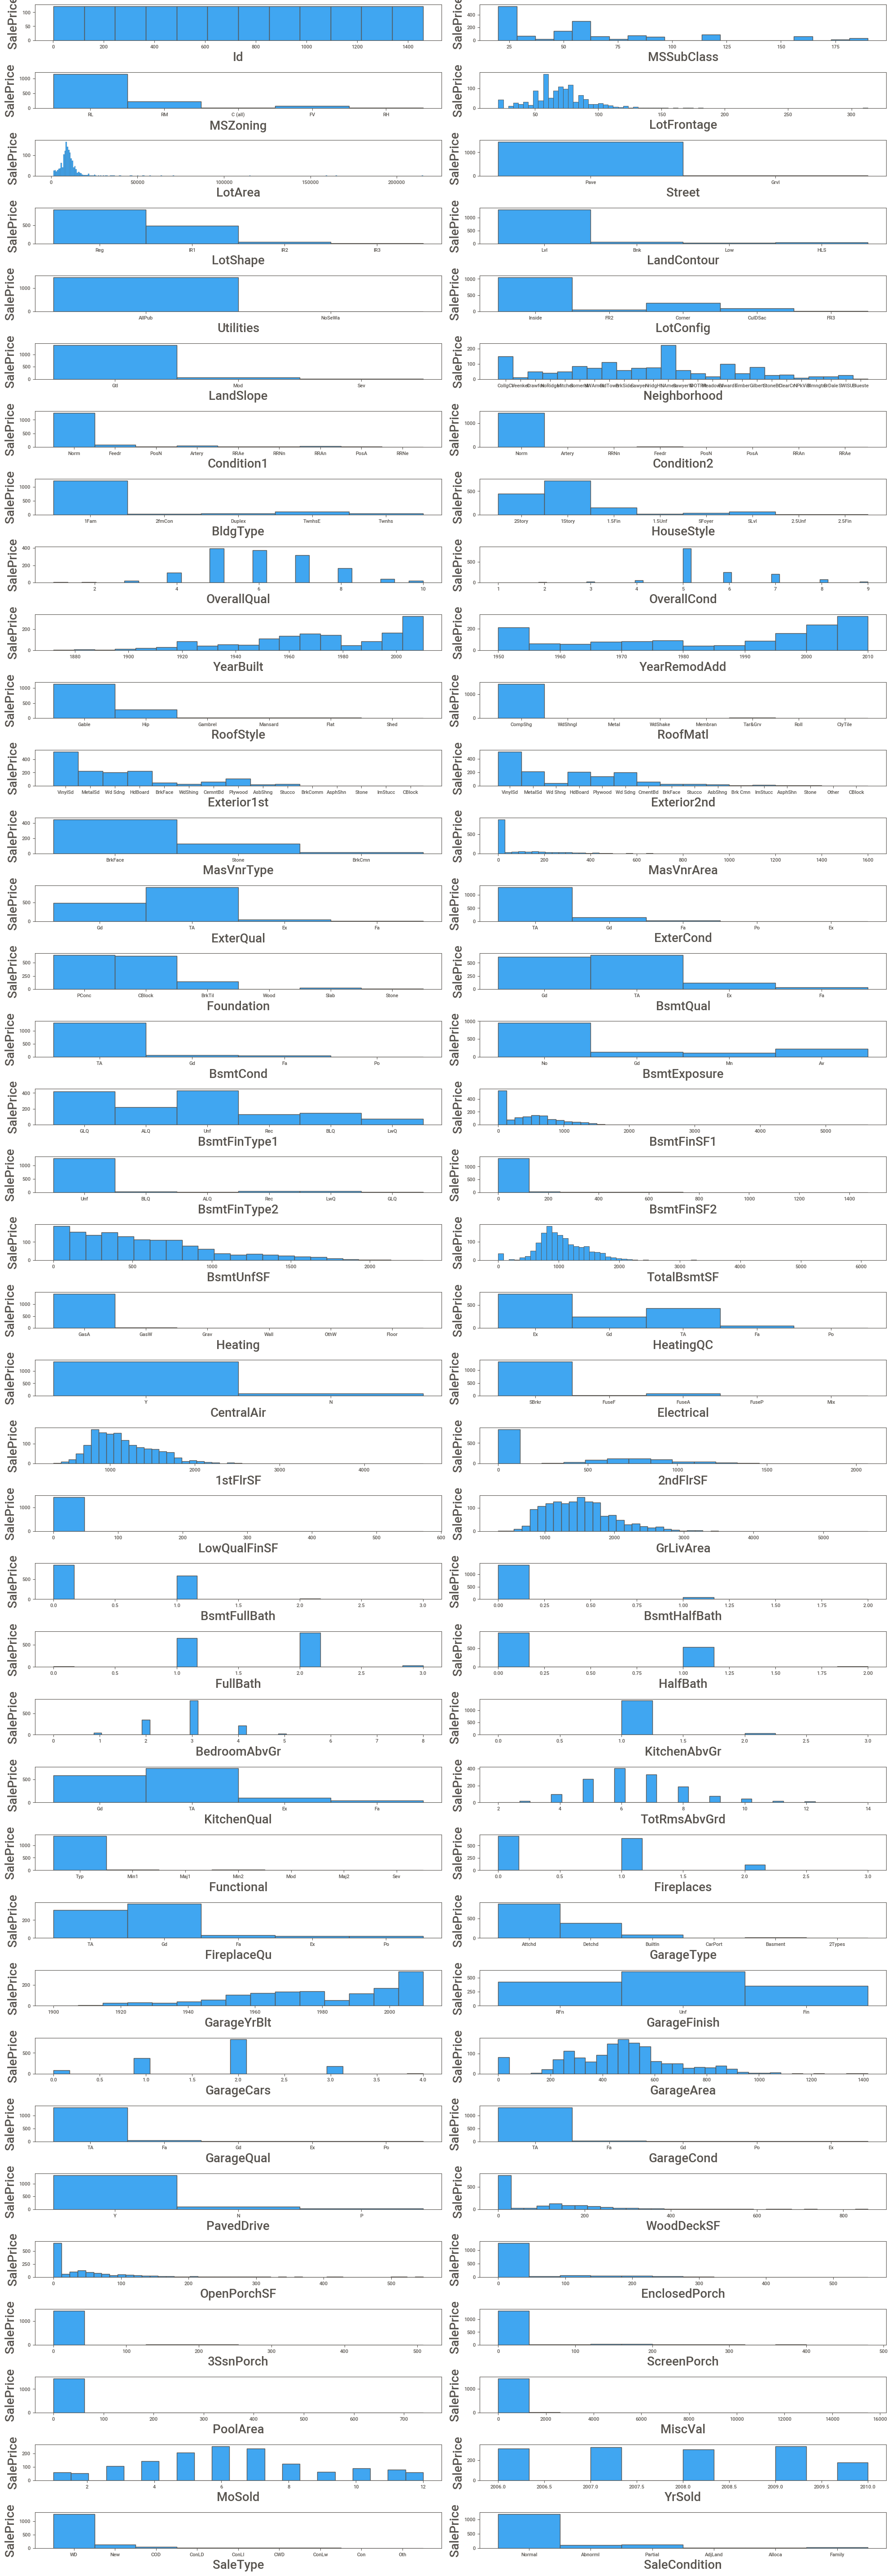

In [13]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=76:
        ax=plt.subplot(40,2,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Univariant Analysis

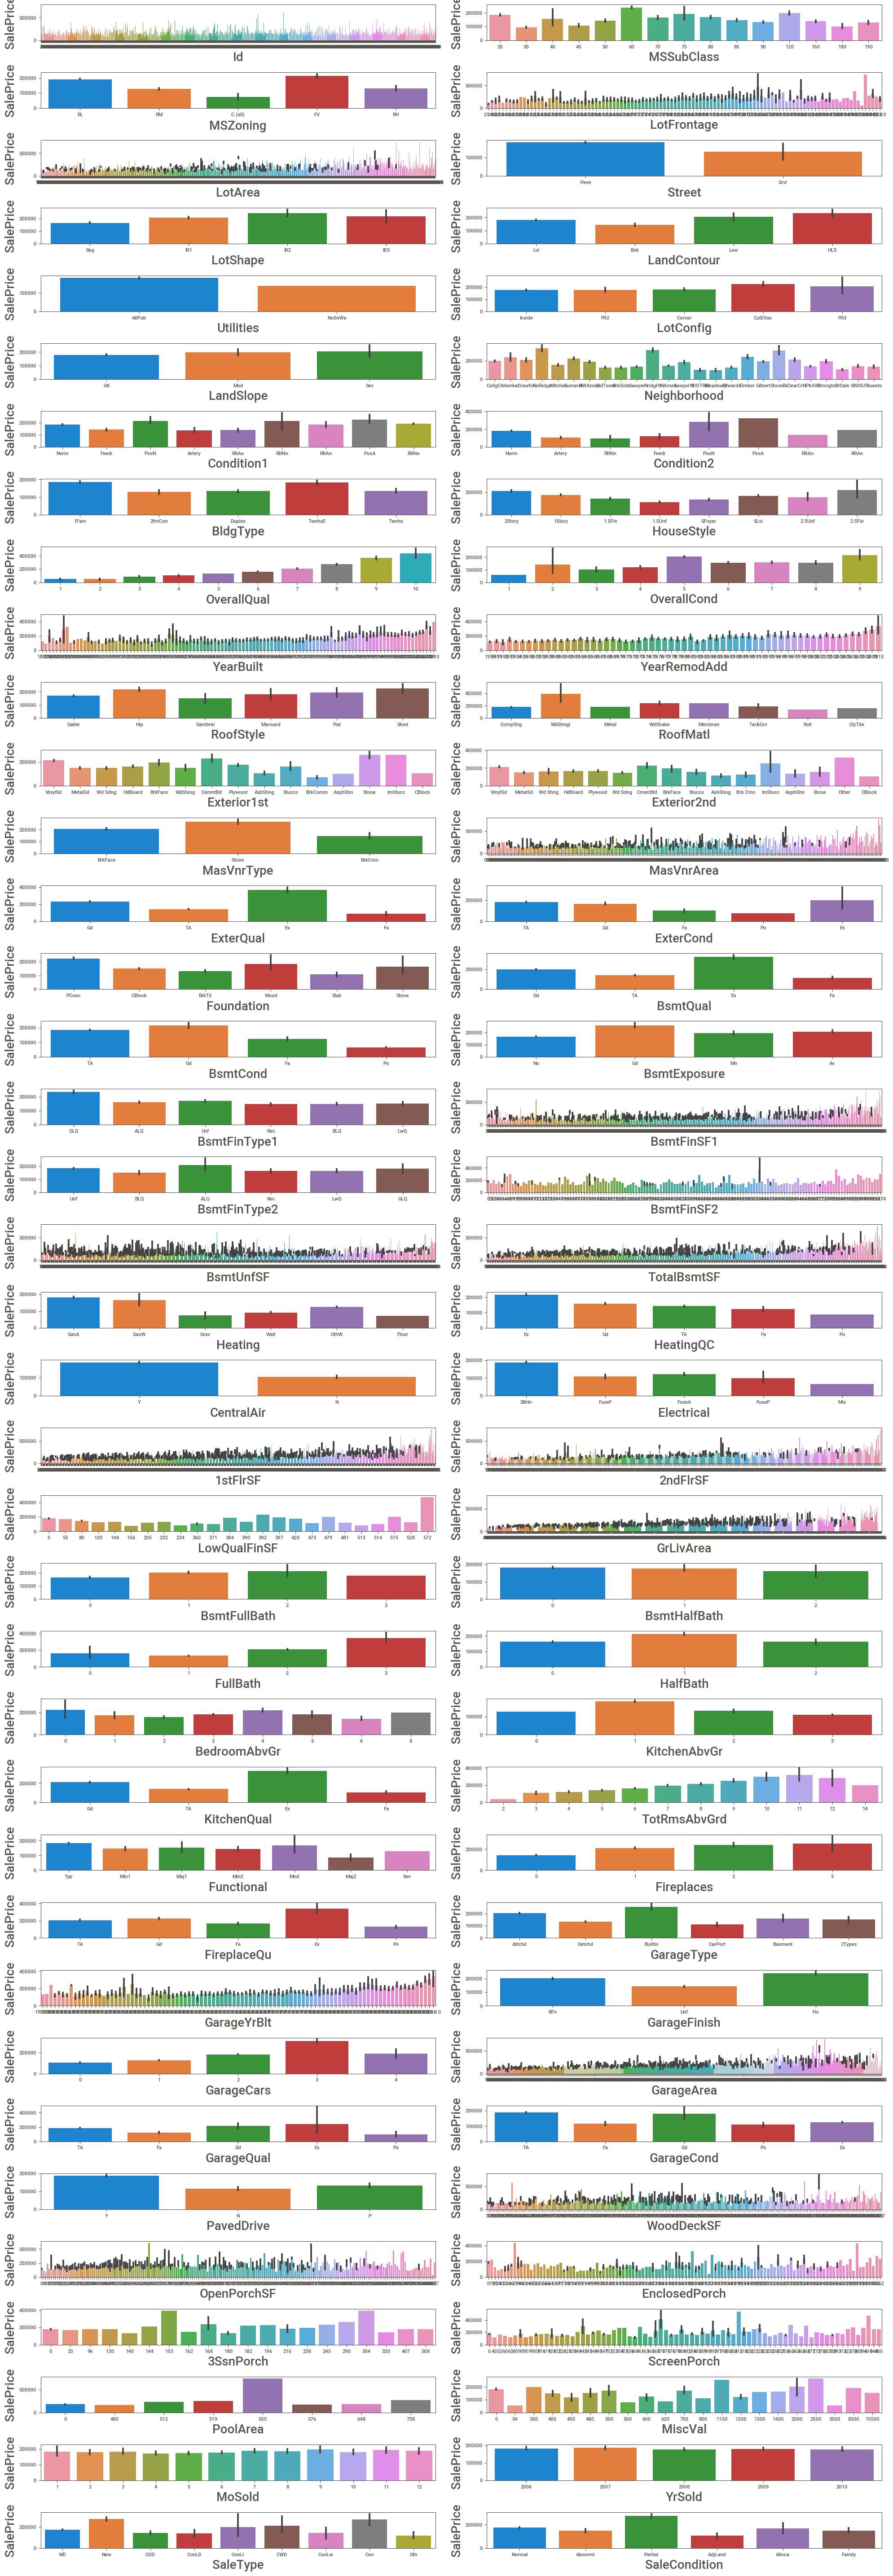

In [14]:
plt.figure(figsize=(20,60),facecolor='white')

plotnumber = 1

for column in data:
    if plotnumber<=76:
        ax = plt.subplot(40,2,plotnumber)
        #sns.countplot(x=data[column],hue=data['SalePrice'])
        a1 = sns.barplot(data=data,x=data[column],y=data["SalePrice"])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Data Preprocessing / Data cleaning

In [15]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64

In [16]:
data['MasVnrType'].isnull()==True

0       False
1        True
2       False
3        True
4       False
        ...  
1455     True
1456    False
1457     True
1458     True
1459     True
Name: MasVnrType, Length: 1460, dtype: bool

In [17]:
data.loc[data['MasVnrType'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [18]:
data.MasVnrType.value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [19]:
data['MasVnrType'].isnull()

0       False
1        True
2       False
3        True
4       False
        ...  
1455     True
1456    False
1457     True
1458     True
1459     True
Name: MasVnrType, Length: 1460, dtype: bool

In [20]:
data['MasVnrType'].mode()

0    BrkFace
Name: MasVnrType, dtype: object

In [21]:
data.loc[  data['MasVnrType'].isnull()==True,'MasVnrType']= "BrkFace"

In [22]:
data['MasVnrType'].isnull().sum()

0

In [23]:
data['BsmtQual'].isnull()==True

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: BsmtQual, Length: 1460, dtype: bool

In [24]:
data.loc[data['BsmtQual'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,...,0,0,0,0,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,...,0,180,0,0,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,12,2008,WD,Normal,97000
342,343,90,RL,NaN,8544,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,...,177,0,0,0,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2008,WD,Normal,134432


In [25]:
data.BsmtQual.value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [26]:
data['BsmtQual'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: BsmtQual, Length: 1460, dtype: bool

In [27]:
data['BsmtQual'].mode()

0    TA
Name: BsmtQual, dtype: object

In [28]:
data.loc[  data['BsmtQual'].isnull()==True,'BsmtQual']= "TA"

In [29]:
data['BsmtQual'].isnull().sum()

0

In [30]:
data['BsmtCond'].isnull()==True

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: BsmtCond, Length: 1460, dtype: bool

In [31]:
data.loc[data['BsmtCond'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,...,0,0,0,0,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,...,0,180,0,0,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,12,2008,WD,Normal,97000
342,343,90,RL,NaN,8544,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,...,177,0,0,0,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2008,WD,Normal,134432


In [32]:
data.BsmtCond.value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [33]:
data['BsmtCond'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: BsmtCond, Length: 1460, dtype: bool

In [34]:
data['BsmtCond'].mode()

0    TA
Name: BsmtCond, dtype: object

In [35]:
data.loc[  data['BsmtCond'].isnull()==True,'BsmtCond']= "TA"

In [36]:
data['BsmtCond'].isnull().sum()

0

In [37]:
data['BsmtExposure'].isnull()==True

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: BsmtExposure, Length: 1460, dtype: bool

In [38]:
data.loc[data['BsmtExposure'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,...,0,0,0,0,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,...,0,180,0,0,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,12,2008,WD,Normal,97000
342,343,90,RL,NaN,8544,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,...,177,0,0,0,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2008,WD,Normal,134432


In [39]:
data.BsmtExposure.value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [40]:
data['BsmtExposure'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: BsmtExposure, Length: 1460, dtype: bool

In [41]:
data['BsmtExposure'].mode()

0    No
Name: BsmtExposure, dtype: object

In [42]:
data.loc[  data['BsmtExposure'].isnull()==True,'BsmtExposure']= "No"

In [43]:
data['BsmtExposure'].isnull().sum()

0

In [44]:
data['BsmtFinType1'].isnull()==True

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: BsmtFinType1, Length: 1460, dtype: bool

In [45]:
data.BsmtFinType1.value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [46]:
data['BsmtFinType1'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: BsmtFinType1, Length: 1460, dtype: bool

In [47]:
data['BsmtFinType1'].mode()

0    Unf
Name: BsmtFinType1, dtype: object

In [48]:
data.loc[  data['BsmtFinType1'].isnull()==True,'BsmtFinType1']= "Unf"

In [49]:
data['BsmtFinType1'].isnull().sum()

0

In [50]:
data['BsmtFinType2'].isnull()==True

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: BsmtFinType2, Length: 1460, dtype: bool

In [51]:
data.BsmtFinType2.value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [52]:
data['BsmtFinType2'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: BsmtFinType2, Length: 1460, dtype: bool

In [53]:
data['BsmtFinType2'].mode()

0    Unf
Name: BsmtFinType2, dtype: object

In [54]:
data.loc[  data['BsmtFinType2'].isnull()==True,'BsmtFinType2']= "Unf"

In [55]:
data['BsmtFinType2'].isnull().sum()

0

In [56]:
data['Electrical'].isnull()==True

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: Electrical, Length: 1460, dtype: bool

In [57]:
data.Electrical.value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [58]:
data['Electrical'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: Electrical, Length: 1460, dtype: bool

In [59]:
data['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [60]:
data.loc[  data['Electrical'].isnull()==True,'Electrical']= "SBrkr"

In [61]:
data['Electrical'].isnull().sum()

0

In [62]:
data['FireplaceQu'].isnull()==True

0        True
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458     True
1459     True
Name: FireplaceQu, Length: 1460, dtype: bool

In [63]:
data.FireplaceQu.value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [64]:
data['FireplaceQu'].isnull()

0        True
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458     True
1459     True
Name: FireplaceQu, Length: 1460, dtype: bool

In [65]:
data['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [66]:
data.loc[  data['FireplaceQu'].isnull()==True,'FireplaceQu']= "Gd"

In [67]:
data['FireplaceQu'].isnull().sum()

0

In [68]:
data['GarageType'].isnull()==True

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GarageType, Length: 1460, dtype: bool

In [69]:
data.GarageType.value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [70]:
data['GarageType'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GarageType, Length: 1460, dtype: bool

In [71]:
data['GarageType'].mode()

0    Attchd
Name: GarageType, dtype: object

In [72]:
data.loc[  data['GarageType'].isnull()==True,'GarageType']= "Attchd"

In [73]:
data['GarageType'].isnull().sum()

0

In [74]:
data['GarageFinish'].isnull()==True

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GarageFinish, Length: 1460, dtype: bool

In [75]:
data.GarageFinish.value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [76]:
data['GarageFinish'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GarageFinish, Length: 1460, dtype: bool

In [77]:
data['GarageFinish'].mode()

0    Unf
Name: GarageFinish, dtype: object

In [78]:
data.loc[  data['GarageFinish'].isnull()==True,'GarageFinish']= "Unf"

In [79]:
data['GarageFinish'].isnull().sum()

0

In [80]:
data['GarageQual'].isnull()==True

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GarageQual, Length: 1460, dtype: bool

In [81]:
data.GarageQual.value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [82]:
data['GarageQual'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GarageQual, Length: 1460, dtype: bool

In [83]:
data['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [84]:
data.loc[  data['GarageQual'].isnull()==True,'GarageQual']= "TA"

In [85]:
data['GarageQual'].isnull().sum()

0

In [86]:
data['GarageCond'].isnull()==True

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GarageCond, Length: 1460, dtype: bool

In [87]:
data.GarageCond.value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [88]:
data['GarageCond'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GarageCond, Length: 1460, dtype: bool

In [89]:
data['GarageCond'].mode()

0    TA
Name: GarageCond, dtype: object

In [90]:
data.loc[  data['GarageCond'].isnull()==True,'GarageCond']= "TA"

In [91]:
data['GarageCond'].isnull().sum()

0

In [92]:
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)

In [93]:
data['LotFrontage'].isnull().sum()

0

In [94]:
data['MasVnrArea'].fillna(data['MasVnrArea'].median(),inplace=True)

In [95]:
data['MasVnrArea'].isnull().sum()

0

In [96]:
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(),inplace=True)

In [97]:
data['GarageYrBlt'].isnull().sum()

0

In [98]:
lb=LabelEncoder()
data['MSZoning']=lb.fit_transform(data['MSZoning'])

In [99]:
lb=LabelEncoder()
data['Street']=lb.fit_transform(data['Street'])

In [100]:
lb=LabelEncoder()
data['LotShape']=lb.fit_transform(data['LotShape'])

In [101]:
lb=LabelEncoder()
data['LandContour']=lb.fit_transform(data['LandContour'])

In [102]:
lb=LabelEncoder()
data['Utilities']=lb.fit_transform(data['Utilities'])

In [103]:
lb=LabelEncoder()
data['LotConfig']=lb.fit_transform(data['LotConfig'])

In [104]:
lb=LabelEncoder()
data['LandSlope']=lb.fit_transform(data['LandSlope'])

In [105]:
lb=LabelEncoder()
data['Neighborhood']=lb.fit_transform(data['Neighborhood'])

In [106]:
lb=LabelEncoder()
data['Condition1']=lb.fit_transform(data['Condition1'])

In [107]:
lb=LabelEncoder()
data['Condition2']=lb.fit_transform(data['Condition2'])

In [108]:
lb=LabelEncoder()
data['HouseStyle']=lb.fit_transform(data['HouseStyle'])

In [109]:
lb=LabelEncoder()
data['BldgType']=lb.fit_transform(data['BldgType'])

In [110]:
lb=LabelEncoder()
data['RoofStyle']=lb.fit_transform(data['RoofStyle'])

In [111]:
lb=LabelEncoder()
data['RoofMatl']=lb.fit_transform(data['RoofMatl'])

In [112]:
lb=LabelEncoder()
data['Exterior1st']=lb.fit_transform(data['Exterior1st'])

In [113]:
lb=LabelEncoder()
data['Exterior2nd']=lb.fit_transform(data['Exterior2nd'])

In [114]:
lb=LabelEncoder()
data['MasVnrType']=lb.fit_transform(data['MasVnrType'])

In [115]:
lb=LabelEncoder()
data['ExterQual']=lb.fit_transform(data['ExterQual'])

In [116]:
lb=LabelEncoder()
data['ExterCond']=lb.fit_transform(data['ExterCond'])

In [117]:
lb=LabelEncoder()
data['Foundation']=lb.fit_transform(data['Foundation'])

In [118]:
lb=LabelEncoder()
data['BsmtQual']=lb.fit_transform(data['BsmtQual'])

In [119]:
lb=LabelEncoder()
data['ExterCond']=lb.fit_transform(data['ExterCond'])

In [120]:
lb=LabelEncoder()
data['BsmtCond']=lb.fit_transform(data['BsmtCond'])

In [121]:
lb=LabelEncoder()
data['BsmtExposure']=lb.fit_transform(data['BsmtExposure'])

In [122]:
lb=LabelEncoder()
data['BsmtFinType1']=lb.fit_transform(data['BsmtFinType1'])

In [123]:
lb=LabelEncoder()
data['BsmtFinType2']=lb.fit_transform(data['BsmtFinType2'])

In [124]:
lb=LabelEncoder()
data['Heating']=lb.fit_transform(data['Heating'])

In [125]:
lb=LabelEncoder()
data['HeatingQC']=lb.fit_transform(data['HeatingQC'])

In [126]:
lb=LabelEncoder()
data['CentralAir']=lb.fit_transform(data['CentralAir'])

In [127]:
lb=LabelEncoder()
data['Electrical']=lb.fit_transform(data['Electrical'])

In [128]:
lb=LabelEncoder()
data['KitchenQual']=lb.fit_transform(data['KitchenQual'])

In [129]:
lb=LabelEncoder()
data['Functional']=lb.fit_transform(data['Functional'])

In [130]:
lb=LabelEncoder()
data['FireplaceQu']=lb.fit_transform(data['FireplaceQu'])

In [131]:
lb=LabelEncoder()
data['GarageType']=lb.fit_transform(data['GarageType'])

In [132]:
lb=LabelEncoder()
data['GarageFinish']=lb.fit_transform(data['GarageFinish'])

In [133]:
lb=LabelEncoder()
data['GarageQual']=lb.fit_transform(data['GarageQual'])

In [134]:
lb=LabelEncoder()
data['GarageCond']=lb.fit_transform(data['GarageCond'])

In [135]:
lb=LabelEncoder()
data['PavedDrive']=lb.fit_transform(data['PavedDrive'])

In [136]:
lb=LabelEncoder()
data['SaleType']=lb.fit_transform(data['SaleType'])

In [137]:
lb=LabelEncoder()
data['SaleCondition']=lb.fit_transform(data['SaleCondition'])

In [138]:
data.LotFrontage = data.LotFrontage.astype('int64')
data.MasVnrArea = data.MasVnrArea.astype('int64')
data.GarageYrBlt = data.GarageYrBlt.astype('int64')
data.Id=data.Id.astype('int64')

# Handle the Outliers

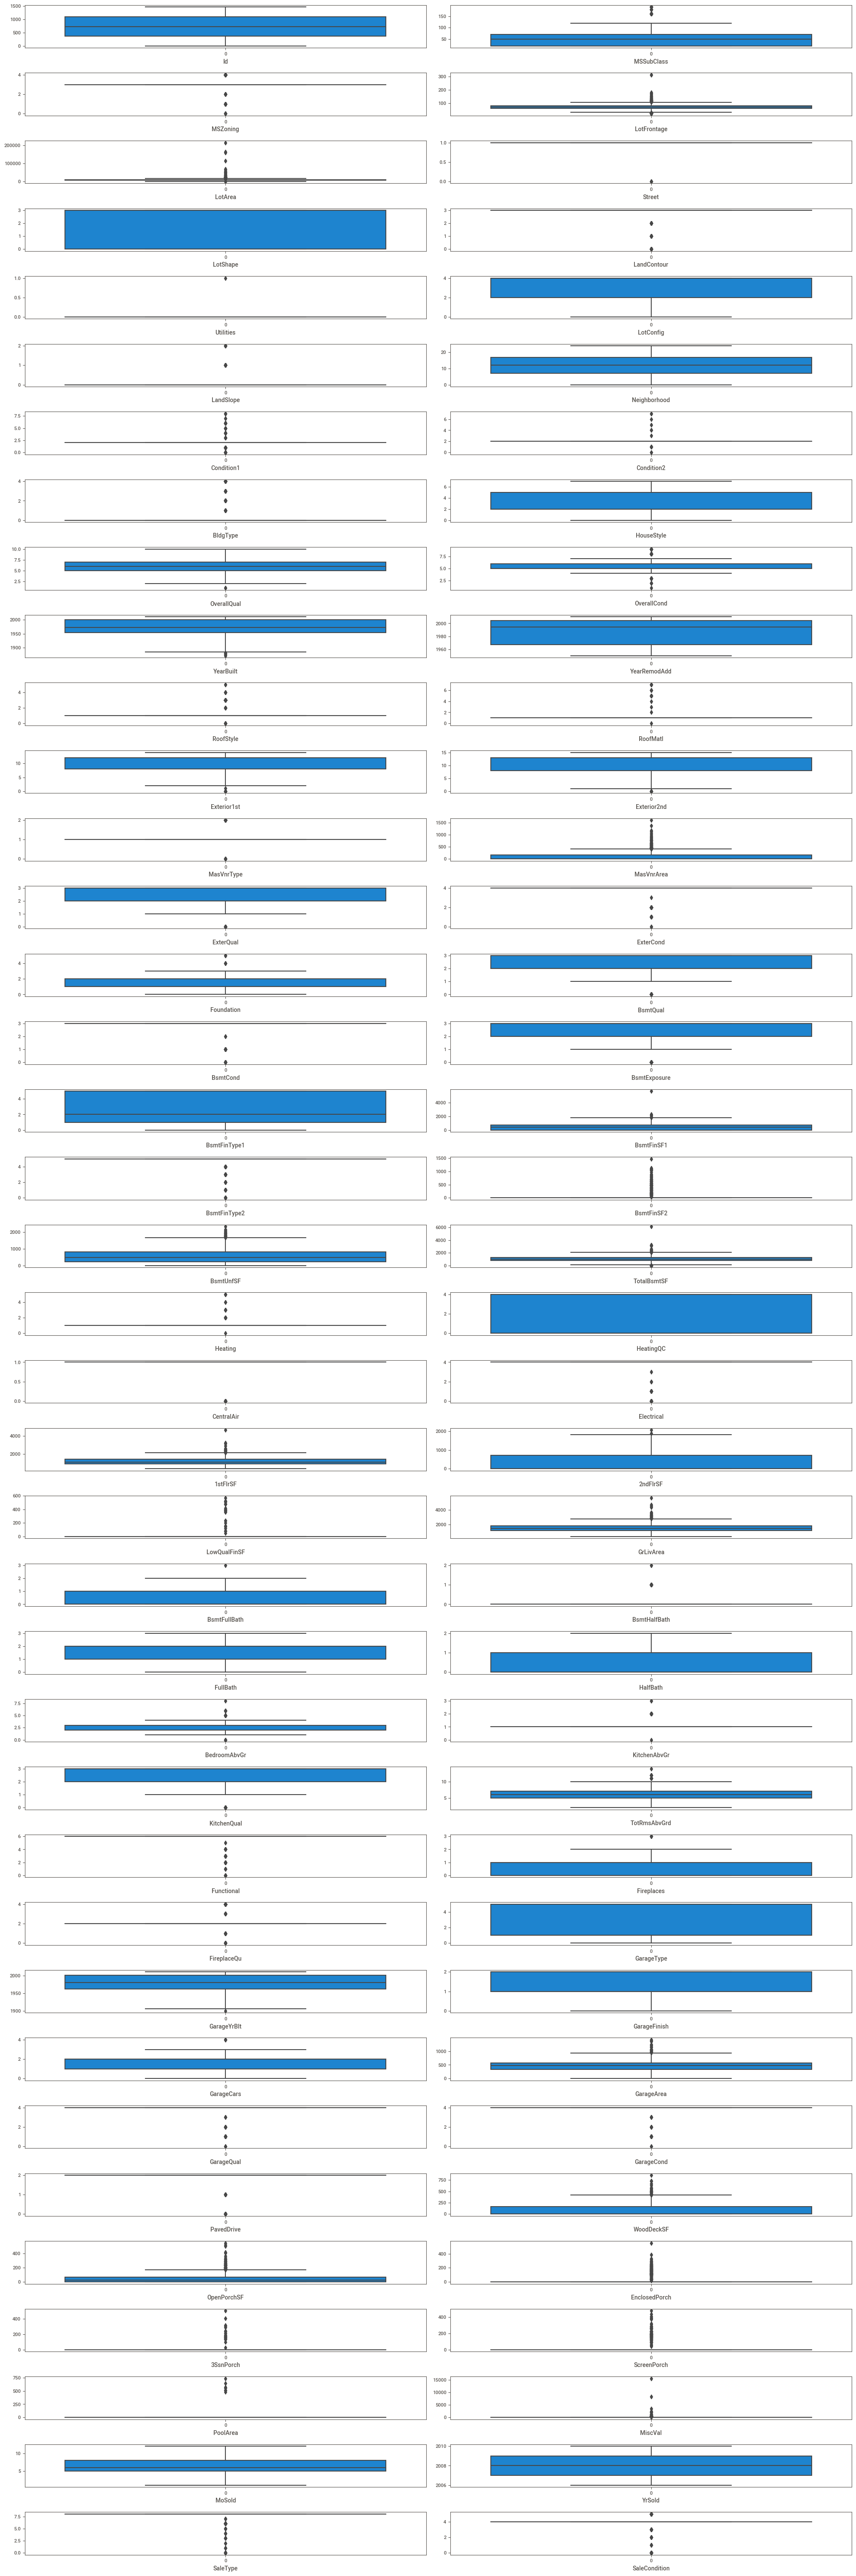

In [139]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=76:
        ax=plt.subplot(38,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    
    
    plotnumber+=1
plt.tight_layout()

In [140]:
data.rename(columns = {'MSSubClass':'mssubclass',
                     'MSZoning':'mszoning',
                     'LotFrontage':'lotfrontage',
                     'LotArea':'lotarea',
                     'Street':'street',
                     'LotShape':'lotshape',
                     'LandContour':'landcontour',
                     'Utilities':'utilities',
                     'LotConfig':'lotconfig',
                     'LandSlope':'landslope',
                     'Neighborhood':'neighborhood',
                     'Condition1':'condition1',
                     'Condition2':'condition2',
                     'BldgType':'bldgtype',
                     'HouseStyle':'housestyle',
                     'OverallQual':'overallqual',
                     'OverallCond':'overallcond',
                     'YearBuilt':'yearbuilt',
                     'YearRemodAdd':'yearremodadd',
                     'RoofStyle':'roofstyle',
                     'RoofMatl':'roofmat1',
                     'Exterior1st':'exterior1st',
                     'Exterior2nd':'exterior2nd',
                     'MasVnrType':'masvnrtype',
                     'MasVnrArea':'masvnrarea',
                     'ExterQual':'exterqual',
                     'ExterCond':'extercond',
                     'Foundation':'foundation',
                     'BsmtQual':'bsmtqual',
                     'BsmtCond':'bsmtcond',
                     'BsmtExposure':'bsmtexposure',
                     'BsmtFinType1':'bsmtfintype1',
                     'BsmtFinSF1':'bsmtfinsf1',
                     'BsmtFinType2':'bsmtfintype2',
                     'BsmtFinSF2':'bsmtfinsf2',
                     'BsmtUnfSF':'bsmtunfsf',
                     'TotalBsmtSF':'totalbsmtsf',
                     'Heating':'heating',
                     'HeatingQC':'heatingqc',
                     'CentralAir':'centralair',
                     'Electrical':'electrical',
                     '1stFlrSF':'flrsf_1st',
                     '2ndFlrSF':'flrsf_2nd',
                     'LowQualFinSF':'lowqualfinsf',
                     'GrLivArea':'grlivarea',
                     'BsmtFullBath':'bsmtfullbath',
                     'BsmtHalfBath':'bsmthalfbath',
                     'FullBath':'fullbath',
                     'HalfBath':'halfbath',
                     'BedroomAbvGr':'bedroomabvgr',
                     'KitchenAbvGr':'kitchenabvgr',
                     'KitchenQual':'kitchenqual',
                     'TotRmsAbvGrd':'totrmsabvgrd',
                     'Functional':'functional',
                     'Fireplaces':'fireplaces',
                     'FireplaceQu':'fireplacequ',
                     'GarageType':'garagetype',
                     'GarageYrBlt':'garageyrblt',
                     'GarageFinish':'garagefinish',
                     'GarageCars':'garagecars',
                     'GarageArea':'garagearea',
                     'GarageQual':'garagequal',
                     'GarageCond':'garagecond',
                     'PavedDrive':'paveddrive',
                     'WoodDeckSF':'wooddecksf',
                     'OpenPorchSF':'openporchsf',
                     'EnclosedPorch':'enclosedporch',
                     '3SsnPorch':'snporch_3s',
                     'ScreenPorch':'screenporch',
                     'PoolArea':'poolarea',
                     'MiscVal':'miscval',
                     'MoSold':'mosold',
                     'YrSold':'yrsold',
                     'SaleType':'saletype',
                     'SaleCondition':'salecondition'},inplace=True)

In [141]:
# finding Q1 and Q3 
Q1=data['lotfrontage'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['lotfrontage'].quantile(0.75)
print('upper quantile',Q3)

lower quantile 60.0
upper quantile 79.0


In [142]:
#calculate IQR
IQR=Q3-Q1
IQR

19.0

In [143]:
## calculate IQR
lower_limit=Q1-1.5*IQR
print('lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)

lower_limit: 31.5
upper_limit: 107.5


In [144]:
data.loc[data['lotfrontage']>upper_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
25,26,20,3,110,14230,1,3,3,0,0,...,0,0,0,0,0,7,2009,8,4,256300
35,36,60,3,108,13418,1,3,3,0,4,...,0,0,0,0,0,9,2006,8,4,309000
36,37,20,3,112,10859,1,3,3,0,0,...,0,0,0,0,0,6,2009,8,4,145000
41,42,20,3,115,16905,1,3,3,0,4,...,0,0,0,0,0,7,2007,8,4,170000
52,53,90,4,110,8472,0,1,0,0,0,...,0,0,0,0,0,5,2010,8,4,110000
85,86,60,3,121,16059,1,3,3,0,0,...,0,0,0,0,0,4,2006,8,4,260000
86,87,60,3,122,11911,1,1,3,0,4,...,0,0,0,0,0,3,2009,8,4,174000
150,151,20,3,120,10356,1,3,3,0,0,...,0,0,0,0,0,1,2007,8,4,122000
159,160,60,3,134,19378,1,0,1,0,0,...,0,168,0,0,0,3,2006,6,5,320000
161,162,60,3,110,13688,1,0,3,0,4,...,0,0,0,0,0,3,2008,8,4,412500


In [145]:
data.loc[data['lotfrontage']<lower_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
56,57,160,1,24,2645,1,3,3,0,4,...,0,0,0,0,0,8,2009,8,0,172500
75,76,180,4,21,1596,1,3,3,0,4,...,0,0,0,0,0,11,2009,8,4,91000
145,146,160,4,24,2522,1,3,3,0,4,...,0,0,0,0,0,4,2006,8,4,130000
193,194,160,4,24,2522,1,3,3,0,4,...,0,0,0,0,0,5,2006,8,4,130000
195,196,160,3,24,2280,1,3,3,0,2,...,0,0,0,0,0,7,2009,8,4,148500
225,226,160,4,21,1680,1,3,3,0,4,...,0,0,0,0,0,5,2009,0,0,112000
227,228,160,4,21,1869,1,3,3,0,4,...,0,0,0,0,0,9,2008,8,4,106000
232,233,160,4,21,1680,1,3,3,0,4,...,0,0,0,0,0,6,2006,8,4,94500
235,236,160,4,21,1680,1,3,3,0,4,...,0,0,0,0,0,8,2008,8,4,89500
264,265,30,4,30,5232,1,2,0,0,4,...,0,0,0,0,0,6,2008,8,4,73000


In [146]:
len(data.loc[data['lotfrontage']<lower_limit])/len(data)*100

3.287671232876712

In [147]:
data.loc[data['lotfrontage']>upper_limit,'lotfrontage']=data['lotfrontage'].median()

<Axes: xlabel='lotfrontage'>

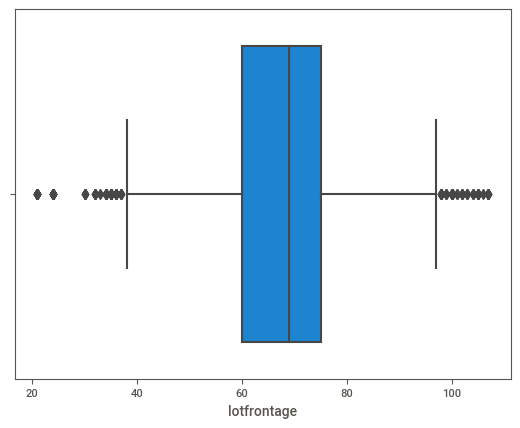

In [148]:
sns.boxplot(x=data['lotfrontage'])

In [149]:
Q1=data['bsmtunfsf'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['bsmtunfsf'].quantile(0.75)
print('upper quantile',Q3)

lower quantile 223.0
upper quantile 808.0


In [150]:
#calculate IQR
IQR=Q3-Q1
IQR

585.0

In [151]:
## calculate IQR
lower_limit=Q1-1.5*IQR
print('lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)

lower_limit: -654.5
upper_limit: 1685.5


In [152]:
data.loc[data['bsmtunfsf']>upper_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
22,23,20,3,75,9742,1,3,3,0,4,...,0,0,0,0,0,9,2008,8,4,230000
78,79,90,3,72,10778,1,3,3,0,4,...,0,0,0,0,0,4,2010,8,4,136500
137,138,90,3,82,11070,1,3,3,0,4,...,0,0,0,0,0,7,2006,8,3,171000
169,170,20,3,69,16669,1,0,3,0,0,...,0,0,0,0,0,1,2006,8,4,228000
224,225,20,3,103,13472,1,3,3,0,4,...,0,0,0,0,0,6,2009,8,4,386250
238,239,20,3,93,12030,1,3,3,0,4,...,0,0,0,0,0,12,2007,6,5,318000
278,279,20,3,107,14450,1,3,3,0,4,...,0,0,142,0,0,5,2007,6,5,415298
350,351,120,3,68,7820,1,0,3,0,4,...,0,0,0,0,0,12,2007,6,5,318061
477,478,60,3,105,13693,1,3,3,0,4,...,0,0,0,0,0,3,2007,8,4,380000
496,497,20,3,69,12692,1,0,3,0,4,...,291,0,0,0,0,5,2007,8,4,430000


In [153]:
data.loc[data['bsmtunfsf']<lower_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice


In [154]:
len(data.loc[data['bsmtunfsf']>upper_limit])/len(data)*100

1.9863013698630139

In [155]:
data.loc[data['bsmtunfsf']>upper_limit,'bsmtunfsf']=data['bsmtunfsf'].median()

<Axes: xlabel='bsmtunfsf'>

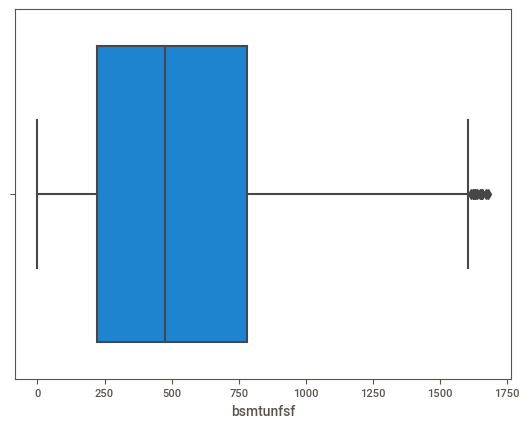

In [156]:
sns.boxplot(x=data['bsmtunfsf'])

In [157]:
Q1=data['totalbsmtsf'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['totalbsmtsf'].quantile(0.75)
print('upper quantile',Q3)

lower quantile 795.75
upper quantile 1298.25


In [158]:
IQR=Q3-Q1
IQR

502.5

In [159]:
lower_limit=Q1-1.5*IQR
print('lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)

lower_limit: 42.0
upper_limit: 2052.0


In [160]:
data.loc[data['totalbsmtsf']>upper_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
70,71,20,3,95,13651,1,0,3,0,4,...,0,0,0,0,0,2,2007,8,4,244000
178,179,20,3,63,17423,1,0,3,0,1,...,0,0,0,0,0,7,2009,6,5,501837
224,225,20,3,103,13472,1,3,3,0,4,...,0,0,0,0,0,6,2009,8,4,386250
278,279,20,3,107,14450,1,3,3,0,4,...,0,0,142,0,0,5,2007,6,5,415298
313,314,20,3,69,215245,1,2,2,0,4,...,0,0,0,0,0,6,2009,8,4,375000
332,333,20,3,85,10655,1,0,3,0,4,...,0,0,0,0,0,10,2009,8,4,284000
440,441,20,3,105,15431,1,3,3,0,4,...,0,0,170,0,0,4,2009,8,4,555000
477,478,60,3,105,13693,1,3,3,0,4,...,0,0,0,0,0,3,2007,8,4,380000
496,497,20,3,69,12692,1,0,3,0,4,...,291,0,0,0,0,5,2007,8,4,430000
523,524,60,3,69,40094,1,0,0,0,4,...,0,0,0,0,0,10,2007,6,5,184750


In [161]:
data.loc[data['totalbsmtsf']<lower_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
17,18,90,3,72,10791,1,3,3,0,4,...,0,0,0,0,500,10,2006,8,4,90000
39,40,90,3,65,6040,1,3,3,0,4,...,0,0,0,0,0,6,2008,8,1,82000
90,91,20,3,60,7200,1,3,3,0,4,...,0,0,0,0,0,7,2006,8,4,109900
102,103,90,3,64,7018,1,3,0,0,4,...,0,0,0,0,0,6,2009,8,2,118964
156,157,20,3,60,7200,1,3,3,0,4,...,0,0,0,0,0,6,2006,8,4,109500
182,183,20,3,60,9060,1,3,3,0,4,...,0,180,0,0,0,6,2007,8,4,120000
259,260,20,4,70,12702,1,3,3,0,4,...,0,0,0,0,0,12,2008,8,4,97000
342,343,90,3,69,8544,1,3,3,0,4,...,0,0,0,0,0,5,2006,8,4,87500
362,363,85,3,64,7301,1,3,3,0,0,...,177,0,0,0,0,7,2009,3,4,198500
371,372,50,3,80,17120,1,3,3,0,4,...,0,0,0,0,0,7,2008,8,4,134432


In [162]:
len(data.loc[data['totalbsmtsf']>upper_limit])/len(data)*100

1.643835616438356

In [163]:
data.loc[data['totalbsmtsf']>upper_limit,'totalbsmtsf']=data['totalbsmtsf'].median()

<Axes: xlabel='totalbsmtsf'>

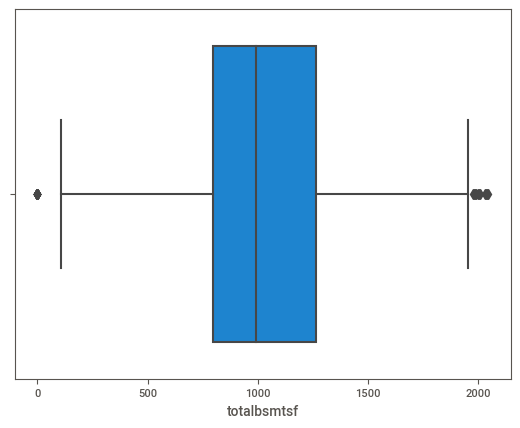

In [164]:
sns.boxplot(x=data['totalbsmtsf'])

In [165]:
Q1=data['flrsf_1st'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['flrsf_1st'].quantile(0.75)
print('upper quantile',Q3)

lower quantile 882.0
upper quantile 1391.25


In [166]:
IQR=Q3-Q1
IQR

509.25

In [167]:
lower_limit=Q1-1.5*IQR
print('lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)

lower_limit: 118.125
upper_limit: 2155.125


In [168]:
data.loc[data['flrsf_1st']>upper_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
66,67,20,3,69,19900,1,3,3,0,4,...,0,0,0,0,0,7,2010,8,4,180000
70,71,20,3,95,13651,1,0,3,0,4,...,0,0,0,0,0,2,2007,8,4,244000
113,114,20,3,69,21000,1,3,0,0,0,...,192,0,0,0,0,10,2007,0,0,217000
175,176,20,3,84,12615,1,3,3,0,0,...,39,0,0,0,0,6,2007,8,4,243000
178,179,20,3,63,17423,1,0,3,0,1,...,0,0,0,0,0,7,2009,6,5,501837
224,225,20,3,103,13472,1,3,3,0,4,...,0,0,0,0,0,6,2009,8,4,386250
440,441,20,3,105,15431,1,3,3,0,4,...,0,0,170,0,0,4,2009,8,4,555000
496,497,20,3,69,12692,1,0,3,0,4,...,291,0,0,0,0,5,2007,8,4,430000
523,524,60,3,69,40094,1,0,0,0,4,...,0,0,0,0,0,10,2007,6,5,184750
529,530,20,3,69,32668,1,0,3,0,1,...,200,0,0,0,0,3,2007,8,2,200624


In [169]:
data.loc[data['flrsf_1st']<lower_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice


In [170]:
len(data.loc[data['flrsf_1st']>upper_limit])/len(data)*100

1.36986301369863

In [171]:
data.loc[data['flrsf_1st']>upper_limit,'flrsf_1st']=data['flrsf_1st'].median()

<Axes: xlabel='flrsf_1st'>

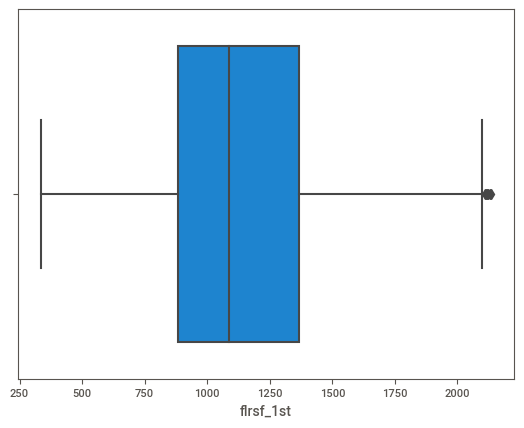

In [172]:
sns.boxplot(x=data['flrsf_1st'])

In [173]:
Q1=data['lowqualfinsf'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['lowqualfinsf'].quantile(0.75)
print('upper quantile',Q3)

lower quantile 0.0
upper quantile 0.0


In [174]:
IQR=Q3-Q1
IQR

0.0

In [175]:
lower_limit=Q1-1.5*IQR
print('lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)

lower_limit: 0.0
upper_limit: 0.0


In [176]:
data.loc[data['lowqualfinsf']>upper_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
51,52,50,4,52,6240,1,3,3,0,4,...,0,0,0,0,400,9,2006,8,4,114500
88,89,50,0,105,8470,1,0,3,0,0,...,156,0,0,0,0,10,2009,3,0,85000
125,126,190,4,60,6780,1,3,3,0,4,...,0,0,0,0,0,6,2006,8,4,84500
170,171,50,4,69,12358,1,0,3,0,4,...,0,0,0,0,0,5,2007,8,4,128500
185,186,75,4,90,22950,1,1,3,0,4,...,0,0,410,0,0,6,2006,8,4,475000
187,188,50,3,60,10410,1,3,3,0,4,...,0,140,0,0,0,8,2009,8,4,135000
197,198,75,3,69,25419,1,3,3,0,0,...,552,0,0,512,0,3,2006,8,0,235000
198,199,75,4,92,5520,1,3,3,0,0,...,30,0,0,0,0,7,2009,8,0,104000
263,264,50,4,50,5500,1,3,3,0,0,...,0,0,0,0,0,4,2010,8,4,130000
267,268,75,3,60,8400,1,3,0,0,4,...,0,0,0,0,0,7,2008,8,4,179500


In [177]:
data.loc[data['lowqualfinsf']<lower_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice


In [178]:
len(data.loc[data['lowqualfinsf']>upper_limit])/len(data)*100

1.7808219178082192

In [179]:
data.loc[data['lowqualfinsf']>upper_limit,'lowqualfinsf']=data['lowqualfinsf'].median()

<Axes: xlabel='lowqualfinsf'>

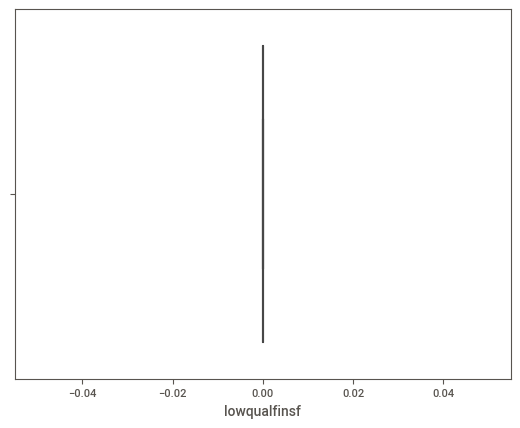

In [180]:
sns.boxplot(x=data['lowqualfinsf'])

In [181]:
Q1=data['grlivarea'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['grlivarea'].quantile(0.75)
print('upper_limit',Q3)

lower quantile 1129.5
upper_limit 1776.75


In [182]:
IQR=Q3-Q1
IQR

647.25

In [183]:
lower_limit=Q1-1.5*IQR
print('lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)

lower_limit: 158.625
upper_limit: 2747.625


In [184]:
data.loc[data['grlivarea']>upper_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
58,59,60,3,66,13682,1,1,1,0,1,...,37,0,0,0,0,10,2006,6,5,438780
118,119,60,3,90,12376,1,3,3,0,0,...,0,0,0,0,0,5,2010,8,4,320000
185,186,75,4,90,22950,1,1,3,0,4,...,0,0,410,0,0,6,2006,8,4,475000
197,198,75,3,69,25419,1,3,3,0,0,...,552,0,0,512,0,3,2006,8,0,235000
231,232,60,3,69,15138,1,0,3,0,4,...,202,0,0,0,0,7,2009,8,4,403000
304,305,75,4,87,18386,1,3,3,0,4,...,0,0,0,0,0,5,2008,8,4,295000
324,325,80,3,96,11275,1,3,3,0,0,...,0,0,0,0,0,6,2010,8,4,242000
496,497,20,3,69,12692,1,0,3,0,4,...,291,0,0,0,0,5,2007,8,4,430000
523,524,60,3,69,40094,1,0,0,0,4,...,0,0,0,0,0,10,2007,6,5,184750
583,584,75,4,75,13500,1,3,3,0,4,...,0,0,0,0,0,7,2008,8,4,325000


In [185]:
data.loc[data['grlivarea']<lower_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice


In [186]:
len(data.loc[data['grlivarea']>upper_limit])/len(data)*100

2.1232876712328768

In [187]:
data.loc[data['grlivarea']>upper_limit,'grlivarea']=data['grlivarea'].median()


<Axes: xlabel='grlivarea'>

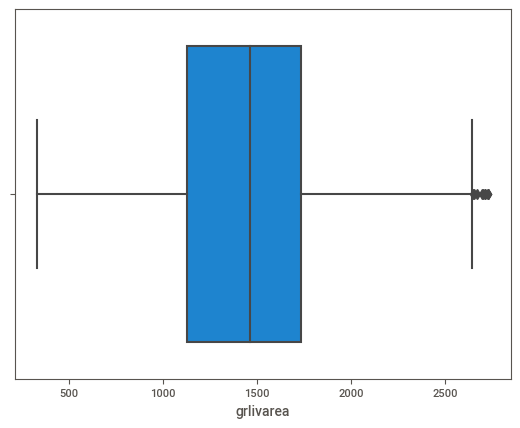

In [188]:
sns.boxplot(x=data['grlivarea'])

In [189]:
Q1=data['bsmthalfbath'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['bsmthalfbath'].quantile(0.75)
print('upper_limit',Q3)

lower quantile 0.0
upper_limit 0.0


In [190]:
IQR=Q3-Q1
IQR

0.0

In [191]:
lower_limit=Q1-1.5*IQR
print('lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)

lower_limit: 0.0
upper_limit: 0.0


In [192]:
data.loc[data['bsmthalfbath']>upper_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
1,2,20,3,80,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
26,27,20,3,60,7200,1,3,3,0,0,...,0,0,0,0,0,5,2010,8,4,134800
33,34,20,3,70,10552,1,0,3,0,4,...,0,0,0,0,0,4,2010,8,4,165500
37,38,20,3,74,8532,1,3,3,0,4,...,0,0,0,0,0,10,2009,8,4,153000
41,42,20,3,69,16905,1,3,3,0,4,...,0,0,0,0,0,7,2007,8,4,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,20,3,80,9650,1,3,3,0,4,...,0,0,0,0,0,4,2009,8,4,167900
1350,1351,90,3,91,11643,1,3,3,0,4,...,0,0,0,0,0,8,2009,8,4,200000
1389,1390,50,4,60,6000,1,3,3,0,4,...,0,0,0,0,0,3,2007,8,4,131000
1405,1406,120,4,44,3842,1,0,1,0,4,...,0,0,155,0,0,1,2008,8,4,275000


In [193]:
data.loc[data['bsmthalfbath']<lower_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice


In [194]:
len(data.loc[data['bsmthalfbath']>upper_limit])/len(data)*100

5.616438356164384

In [195]:
data.loc[data['bsmthalfbath']>upper_limit,'bsmthalfbath']=data['bsmthalfbath'].median()

<Axes: xlabel='bsmthalfbath'>

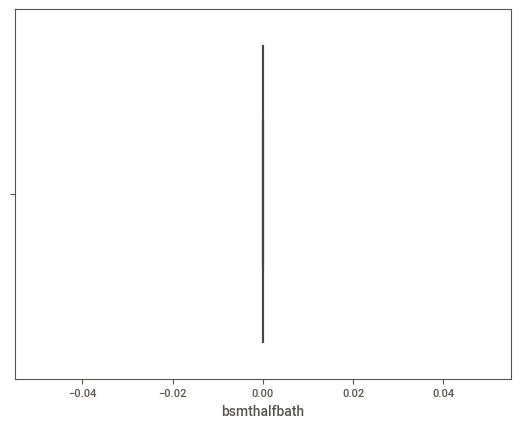

In [196]:
sns.boxplot(x=data['bsmthalfbath'])

In [197]:
Q1=data['bedroomabvgr'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['bedroomabvgr'].quantile(0.75)
print('upper_limit',Q3)

lower quantile 2.0
upper_limit 3.0


In [198]:
IQR=Q3-Q1
IQR

1.0

In [199]:
lower_limit=Q1-1.5*IQR
print('lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)

lower_limit: 0.5
upper_limit: 4.5


In [200]:
data.loc[data['bedroomabvgr']>upper_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
118,119,60,3,90,12376,1,3,3,0,0,...,0,0,0,0,0,5,2010,8,4,320000
137,138,90,3,82,11070,1,3,3,0,4,...,0,0,0,0,0,7,2006,8,3,171000
144,145,90,4,70,9100,1,3,3,0,4,...,0,0,0,0,0,11,2006,4,0,125000
198,199,75,4,92,5520,1,3,3,0,0,...,30,0,0,0,0,7,2009,8,0,104000
291,292,190,3,55,5687,1,3,0,0,4,...,0,0,0,0,0,3,2008,8,4,135900
324,325,80,3,96,11275,1,3,3,0,0,...,0,0,0,0,0,6,2010,8,4,242000
328,329,75,3,69,11888,1,0,0,0,4,...,268,0,0,0,0,7,2009,8,4,214500
330,331,90,3,69,10624,1,0,3,0,4,...,0,0,0,0,0,11,2007,8,4,119000
386,387,50,3,58,8410,1,3,3,0,2,...,0,0,0,0,0,5,2006,8,1,81000
570,571,90,3,74,13101,1,0,3,0,4,...,0,0,0,0,0,11,2008,8,4,142600


In [201]:
data.loc[data['bedroomabvgr']<lower_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
53,54,20,3,68,50271,1,0,2,0,4,...,0,0,0,0,0,11,2006,8,4,385000
189,190,120,3,41,4923,1,3,3,0,4,...,0,0,224,0,0,8,2008,8,4,286000
634,635,90,3,64,6979,1,3,3,0,4,...,0,0,0,0,600,6,2010,8,4,144000
1163,1164,90,3,60,12900,1,3,3,0,4,...,0,0,0,0,0,1,2008,8,2,108959
1213,1214,80,3,69,10246,1,0,3,0,1,...,0,0,0,0,0,5,2006,8,4,145000
1270,1271,40,3,69,23595,1,3,2,0,4,...,0,0,0,0,0,4,2010,8,4,260000


In [202]:
len(data.loc[data['bedroomabvgr']>upper_limit])/len(data)*100

1.9863013698630139

In [203]:
data.loc[data['bedroomabvgr']>upper_limit,'bedroomabvgr']=data['bedroomabvgr'].median()

<Axes: xlabel='bedroomabvgr'>

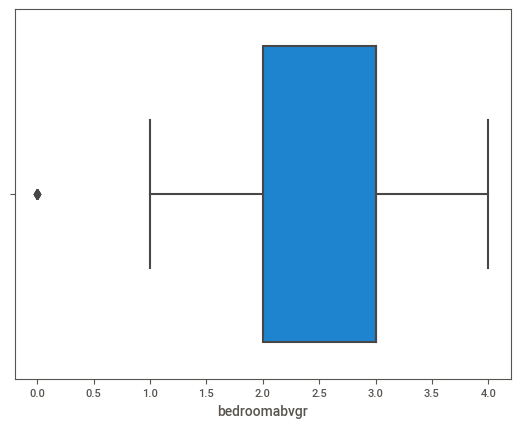

In [204]:
sns.boxplot(x=data['bedroomabvgr'])

In [205]:
Q1=data['kitchenabvgr'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['kitchenabvgr'].quantile(0.75)
print('upper_limit',Q3)

lower quantile 1.0
upper_limit 1.0


In [206]:
IQR=Q3-Q1
IQR

0.0

In [207]:
lower_limit=Q1-1.5*IQR
print('lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)

lower_limit: 1.0
upper_limit: 1.0


In [208]:
data.loc[data['kitchenabvgr']>upper_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
8,9,50,4,51,6120,1,3,3,0,4,...,205,0,0,0,0,4,2008,8,0,129900
9,10,190,3,50,7420,1,3,3,0,0,...,0,0,0,0,0,1,2008,8,4,118000
17,18,90,3,72,10791,1,3,3,0,4,...,0,0,0,0,500,10,2006,8,4,90000
39,40,90,3,65,6040,1,3,3,0,4,...,0,0,0,0,0,6,2008,8,1,82000
48,49,190,4,33,4456,1,3,3,0,4,...,102,0,0,0,0,6,2009,6,5,113000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,1392,90,3,65,8944,1,3,3,0,4,...,0,0,0,0,0,4,2009,8,4,124000
1393,1394,190,4,60,10800,1,3,3,0,4,...,212,0,0,0,0,4,2008,8,4,163000
1412,1413,90,3,60,7200,1,3,3,0,4,...,0,0,0,0,0,6,2009,8,4,90000
1416,1417,190,4,60,11340,1,3,3,0,4,...,114,0,0,0,0,4,2010,8,4,122500


In [209]:
data.loc[data['kitchenabvgr']<lower_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
954,955,90,3,35,9400,1,0,3,0,1,...,0,0,0,0,0,10,2006,8,1,127500


In [210]:
2/1460*100

0.136986301369863

In [211]:
len(data.loc[data['kitchenabvgr']>upper_limit])/len(data)*100

4.589041095890411

In [212]:
data.loc[data['kitchenabvgr']>upper_limit,'kitchenabvgr']=data['kitchenabvgr'].median()

<Axes: xlabel='kitchenabvgr'>

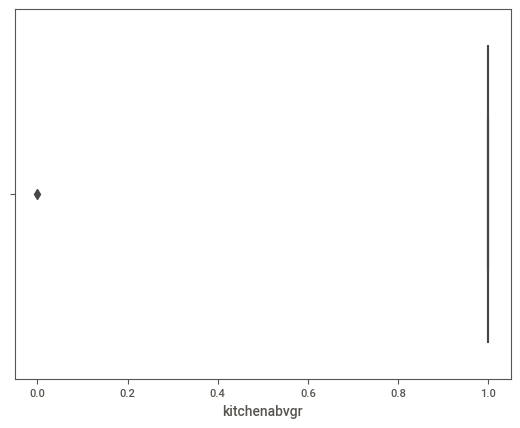

In [213]:
sns.boxplot(x=data['kitchenabvgr'])

In [214]:
Q1=data['totrmsabvgrd'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['totrmsabvgrd'].quantile(0.75)
print('upper_limit',Q3)

lower quantile 5.0
upper_limit 7.0


In [215]:
IQR=Q3-Q1
IQR

2.0

In [216]:
lower_limit=Q1-1.5*IQR
print('lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)

lower_limit: 2.0
upper_limit: 10.0


In [217]:
data.loc[data['totrmsabvgrd']>upper_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
11,12,60,3,85,11924,1,0,3,0,4,...,0,0,0,0,0,7,2006,6,5,345000
118,119,60,3,90,12376,1,3,3,0,0,...,0,0,0,0,0,5,2010,8,4,320000
185,186,75,4,90,22950,1,1,3,0,4,...,0,0,410,0,0,6,2006,8,4,475000
324,325,80,3,96,11275,1,3,3,0,0,...,0,0,0,0,0,6,2010,8,4,242000
523,524,60,3,69,40094,1,0,0,0,4,...,0,0,0,0,0,10,2007,6,5,184750
527,528,60,3,67,14948,1,0,3,0,4,...,0,0,0,0,0,11,2008,6,5,446261
566,567,60,3,77,11198,1,0,3,0,4,...,0,0,0,0,0,6,2008,8,4,325000
635,636,190,2,60,10896,1,3,0,0,4,...,0,0,0,0,0,3,2007,8,0,200000
745,746,60,3,69,8963,1,0,3,0,4,...,0,0,0,0,0,7,2008,8,4,299800
769,770,60,3,47,53504,1,1,1,0,1,...,0,0,210,0,0,6,2010,8,4,538000


In [218]:
data.loc[data['totrmsabvgrd']<lower_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice


In [219]:
2/1460*100

0.136986301369863

In [220]:
len(data.loc[data['totrmsabvgrd']>upper_limit])/len(data)*100

2.054794520547945

In [221]:
data.loc[data['totrmsabvgrd']>upper_limit,'totrmsabvgrd']=data['totrmsabvgrd'].median()

<Axes: xlabel='totrmsabvgrd'>

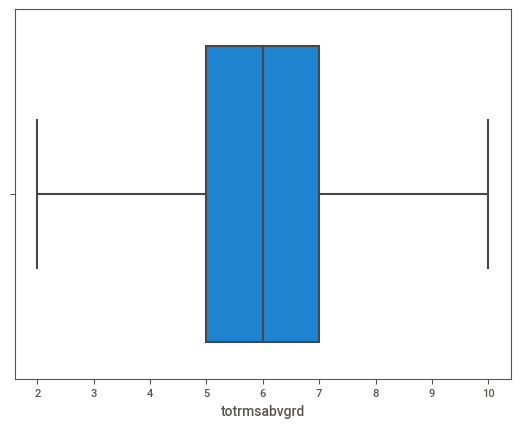

In [222]:
sns.boxplot(x=data['totrmsabvgrd'])

In [223]:
Q1=data['garagearea'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['garagearea'].quantile(0.75)
print('upper_limit',Q3)

lower quantile 334.5
upper_limit 576.0


In [224]:
IQR=Q3-Q1
IQR

241.5

In [225]:
lower_limit=Q1-1.5*IQR
print('lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)

lower_limit: -27.75
upper_limit: 938.25


In [226]:
data.loc[data['garagearea']>upper_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
178,179,20,3,63,17423,1,0,3,0,1,...,0,0,0,0,0,7,2009,6,5,501837
224,225,20,3,103,13472,1,3,3,0,4,...,0,0,0,0,0,6,2009,8,4,386250
270,271,60,1,84,10728,1,3,3,0,4,...,0,0,0,0,0,8,2006,6,5,266000
317,318,60,1,75,9000,1,3,3,0,4,...,0,0,0,0,0,12,2007,8,4,270000
408,409,60,3,69,14154,1,3,3,0,0,...,0,0,0,0,0,8,2007,6,5,280000
581,582,20,3,98,12704,1,3,3,0,4,...,0,0,0,0,0,8,2009,6,5,253293
664,665,20,3,49,20896,1,1,3,0,1,...,0,0,0,0,0,1,2006,6,5,423000
718,719,60,3,96,10542,1,3,3,0,4,...,216,0,0,0,0,8,2008,8,4,341000
803,804,60,3,107,13891,1,3,3,0,4,...,0,0,192,0,0,1,2009,6,5,582933
825,826,20,3,69,14803,1,3,3,0,4,...,0,0,0,0,0,6,2008,6,5,385000


In [227]:
data.loc[data['garagearea']<lower_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice


In [228]:
len(data.loc[data['garagearea']>upper_limit])/len(data)*100

1.4383561643835616

In [229]:
data.loc[data['garagearea']>upper_limit,'garagearea']=data['garagearea'].median()

<Axes: xlabel='garagearea'>

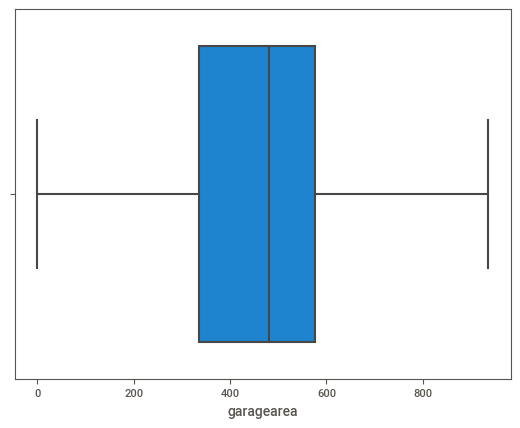

In [230]:
sns.boxplot(x=data['garagearea'])

In [231]:
Q1=data['snporch_3s'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['snporch_3s'].quantile(0.75)
print('upper_limit',Q3)

lower quantile 0.0
upper_limit 0.0


In [232]:
IQR=Q3-Q1
IQR

0.0

In [233]:
lower_limit=Q1-1.5*IQR
print('lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)

lower_limit: 0.0
upper_limit: 0.0


In [234]:
data.loc[data['snporch_3s']>upper_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
5,6,50,3,85,14115,1,0,3,0,4,...,0,320,0,0,700,10,2009,8,4,143000
55,56,20,3,100,10175,1,0,3,0,4,...,0,407,0,0,0,7,2008,8,4,180500
120,121,80,3,69,21453,1,0,2,0,1,...,0,130,0,0,0,10,2006,8,4,180000
129,130,20,3,69,8973,1,3,3,0,4,...,0,180,0,0,0,7,2006,8,0,150000
159,160,60,3,69,19378,1,0,1,0,0,...,0,168,0,0,0,3,2006,6,5,320000
182,183,20,3,60,9060,1,3,3,0,4,...,0,180,0,0,0,6,2007,8,4,120000
187,188,50,3,60,10410,1,3,3,0,4,...,0,140,0,0,0,8,2009,8,4,135000
205,206,20,3,99,11851,1,3,3,0,0,...,0,508,0,0,0,5,2009,8,4,180500
237,238,60,3,69,9453,1,0,3,0,1,...,0,238,0,0,0,2,2010,8,4,194500
258,259,60,3,80,12435,1,3,3,0,4,...,0,245,0,0,0,5,2008,8,4,231500


In [235]:
data.loc[data['snporch_3s']<lower_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice


In [236]:
len(data.loc[data['snporch_3s']>upper_limit])/len(data)*100

1.643835616438356

In [237]:
data.loc[data['snporch_3s']>upper_limit,'snporch_3s']=data['snporch_3s'].median()

<Axes: xlabel='snporch_3s'>

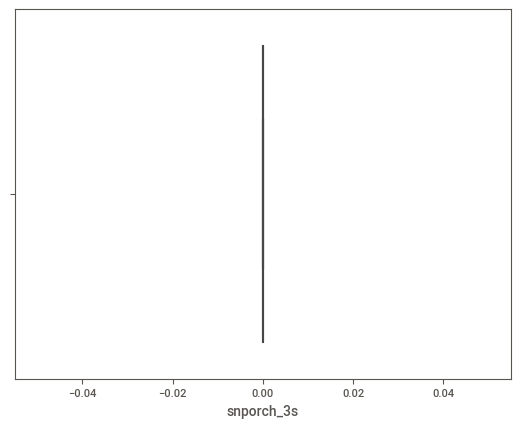

In [238]:
sns.boxplot(x=data['snporch_3s'])

In [239]:
Q1=data['miscval'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['miscval'].quantile(0.75)
print('upper_limit',Q3)

lower quantile 0.0
upper_limit 0.0


In [240]:
IQR=Q3-Q1
IQR

0.0

In [241]:
lower_limit=Q1-1.5*IQR
print('lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)

lower_limit: 0.0
upper_limit: 0.0


In [242]:
data.loc[data['miscval']>upper_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice
5,6,50,3,85,14115,1,0,3,0,4,...,0,0,0,0,700,10,2009,8,4,143000
7,8,60,3,69,10382,1,0,3,0,0,...,228,0,0,0,350,11,2009,8,4,200000
16,17,20,3,69,11241,1,0,3,0,1,...,0,0,0,0,700,3,2010,8,4,149000
17,18,90,3,72,10791,1,3,3,0,4,...,0,0,0,0,500,10,2006,8,4,90000
51,52,50,4,52,6240,1,3,3,0,4,...,0,0,0,0,400,9,2006,8,4,114500
84,85,80,3,69,8530,1,0,3,0,4,...,0,0,0,0,700,5,2009,8,4,168500
95,96,60,3,69,9765,1,1,3,0,0,...,0,0,0,0,480,4,2009,8,4,185000
98,99,30,3,85,10625,1,3,3,0,0,...,77,0,0,0,400,5,2010,0,0,83000
99,100,20,3,77,9320,1,0,3,0,4,...,0,0,0,0,400,1,2010,8,4,128950
106,107,30,4,60,10800,1,3,3,0,4,...,0,0,0,0,450,8,2007,8,4,100000


In [243]:
data.loc[data['miscval']<lower_limit]

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,SalePrice


In [244]:
len(data.loc[data['miscval']>upper_limit])/len(data)*100

3.5616438356164384

In [245]:
data.loc[data['miscval']>upper_limit,'miscval']=data['miscval'].median()

<Axes: xlabel='miscval'>

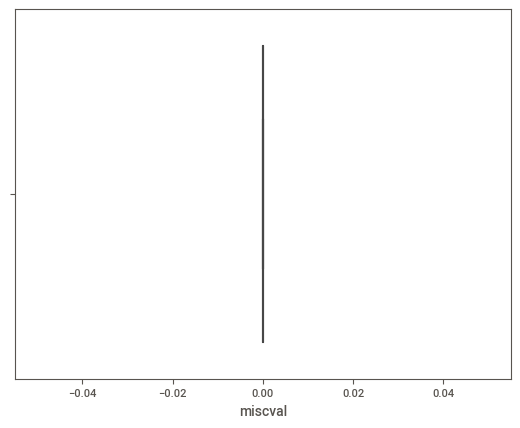

In [246]:
sns.boxplot(x=data['miscval'])

In [247]:
data.shape

(1460, 77)

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   int32  
 3   lotfrontage    1460 non-null   int64  
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   int32  
 6   lotshape       1460 non-null   int32  
 7   landcontour    1460 non-null   int32  
 8   utilities      1460 non-null   int32  
 9   lotconfig      1460 non-null   int32  
 10  landslope      1460 non-null   int32  
 11  neighborhood   1460 non-null   int32  
 12  condition1     1460 non-null   int32  
 13  condition2     1460 non-null   int32  
 14  bldgtype       1460 non-null   int32  
 15  housestyle     1460 non-null   int32  
 16  overallqual    1460 non-null   int64  
 17  overallcond    1460 non-null   int64  
 18  yearbuil

# Preparation of training testing data

In [249]:
# Split X and y for model
X = data.drop('SalePrice',axis=1)
Y = data.SalePrice     

In [250]:
X

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,openporchsf,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition
0,1,60,3,65,8450,1,3,3,0,4,...,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,80,9600,1,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,68,11250,1,0,3,0,4,...,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,60,9550,1,0,3,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,84,14260,1,0,3,0,2,...,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62,7917,1,3,3,0,4,...,40,0,0,0,0,0,8,2007,8,4
1456,1457,20,3,85,13175,1,3,3,0,4,...,0,0,0,0,0,0,2,2010,8,4
1457,1458,70,3,66,9042,1,3,3,0,4,...,60,0,0,0,0,0,5,2010,8,4
1458,1459,20,3,68,9717,1,3,3,0,4,...,0,112,0,0,0,0,4,2010,8,4


In [251]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [252]:
sc=StandardScaler()
X_Scaled = sc.fit_transform(X)

In [253]:
X_Scaled 

array([[-1.73086488,  0.07337496, -0.04553194, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       [-1.7284922 , -0.87256276, -0.04553194, ..., -0.61443862,
         0.31386709,  0.2085023 ],
       [-1.72611953,  0.07337496, -0.04553194, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       ...,
       [ 1.72611953,  0.30985939, -0.04553194, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [ 1.7284922 , -0.87256276, -0.04553194, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [ 1.73086488, -0.87256276, -0.04553194, ...,  0.13877749,
         0.31386709,  0.2085023 ]])

In [254]:
X=pd.DataFrame(X_Scaled,columns=X.columns)

In [255]:
X

,Id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,openporchsf,enclosedporch,snporch_3s,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition
0,-1.730865,0.073375,-0.045532,-0.142789,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,...,0.216503,-0.359325,0.0,-0.270208,-0.068692,0.0,-1.599111,0.138777,0.313867,0.208502
1,-1.728492,-0.872563,-0.045532,0.791781,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,...,-0.704483,-0.359325,0.0,-0.270208,-0.068692,0.0,-0.489110,-0.614439,0.313867,0.208502
2,-1.726120,0.073375,-0.045532,0.044125,0.073480,0.064238,-1.378933,0.314667,-0.02618,0.604670,...,-0.070361,-0.359325,0.0,-0.270208,-0.068692,0.0,0.990891,0.138777,0.313867,0.208502
3,-1.723747,0.309859,-0.045532,-0.454312,-0.096897,0.064238,-1.378933,0.314667,-0.02618,-1.861302,...,-0.176048,4.092524,0.0,-0.270208,-0.068692,0.0,-1.599111,-1.367655,0.313867,-3.426284
4,-1.721374,0.073375,-0.045532,1.040999,0.375148,0.064238,-1.378933,0.314667,-0.02618,-0.628316,...,0.563760,-0.359325,0.0,-0.270208,-0.068692,0.0,2.100892,0.138777,0.313867,0.208502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.045532,-0.329702,-0.260560,0.064238,0.750731,0.314667,-0.02618,0.604670,...,-0.100558,-0.359325,0.0,-0.270208,-0.068692,0.0,0.620891,-0.614439,0.313867,0.208502
1456,1.723747,-0.872563,-0.045532,1.103304,0.266407,0.064238,0.750731,0.314667,-0.02618,0.604670,...,-0.704483,-0.359325,0.0,-0.270208,-0.068692,0.0,-1.599111,1.645210,0.313867,0.208502
1457,1.726120,0.309859,-0.045532,-0.080484,-0.147810,0.064238,0.750731,0.314667,-0.02618,0.604670,...,0.201405,-0.359325,0.0,-0.270208,-0.068692,0.0,-0.489110,1.645210,0.313867,0.208502
1458,1.728492,-0.872563,-0.045532,0.044125,-0.080160,0.064238,0.750731,0.314667,-0.02618,0.604670,...,-0.704483,1.473789,0.0,-0.270208,-0.068692,0.0,-0.859110,1.645210,0.313867,0.208502


# Heat map for feature selection

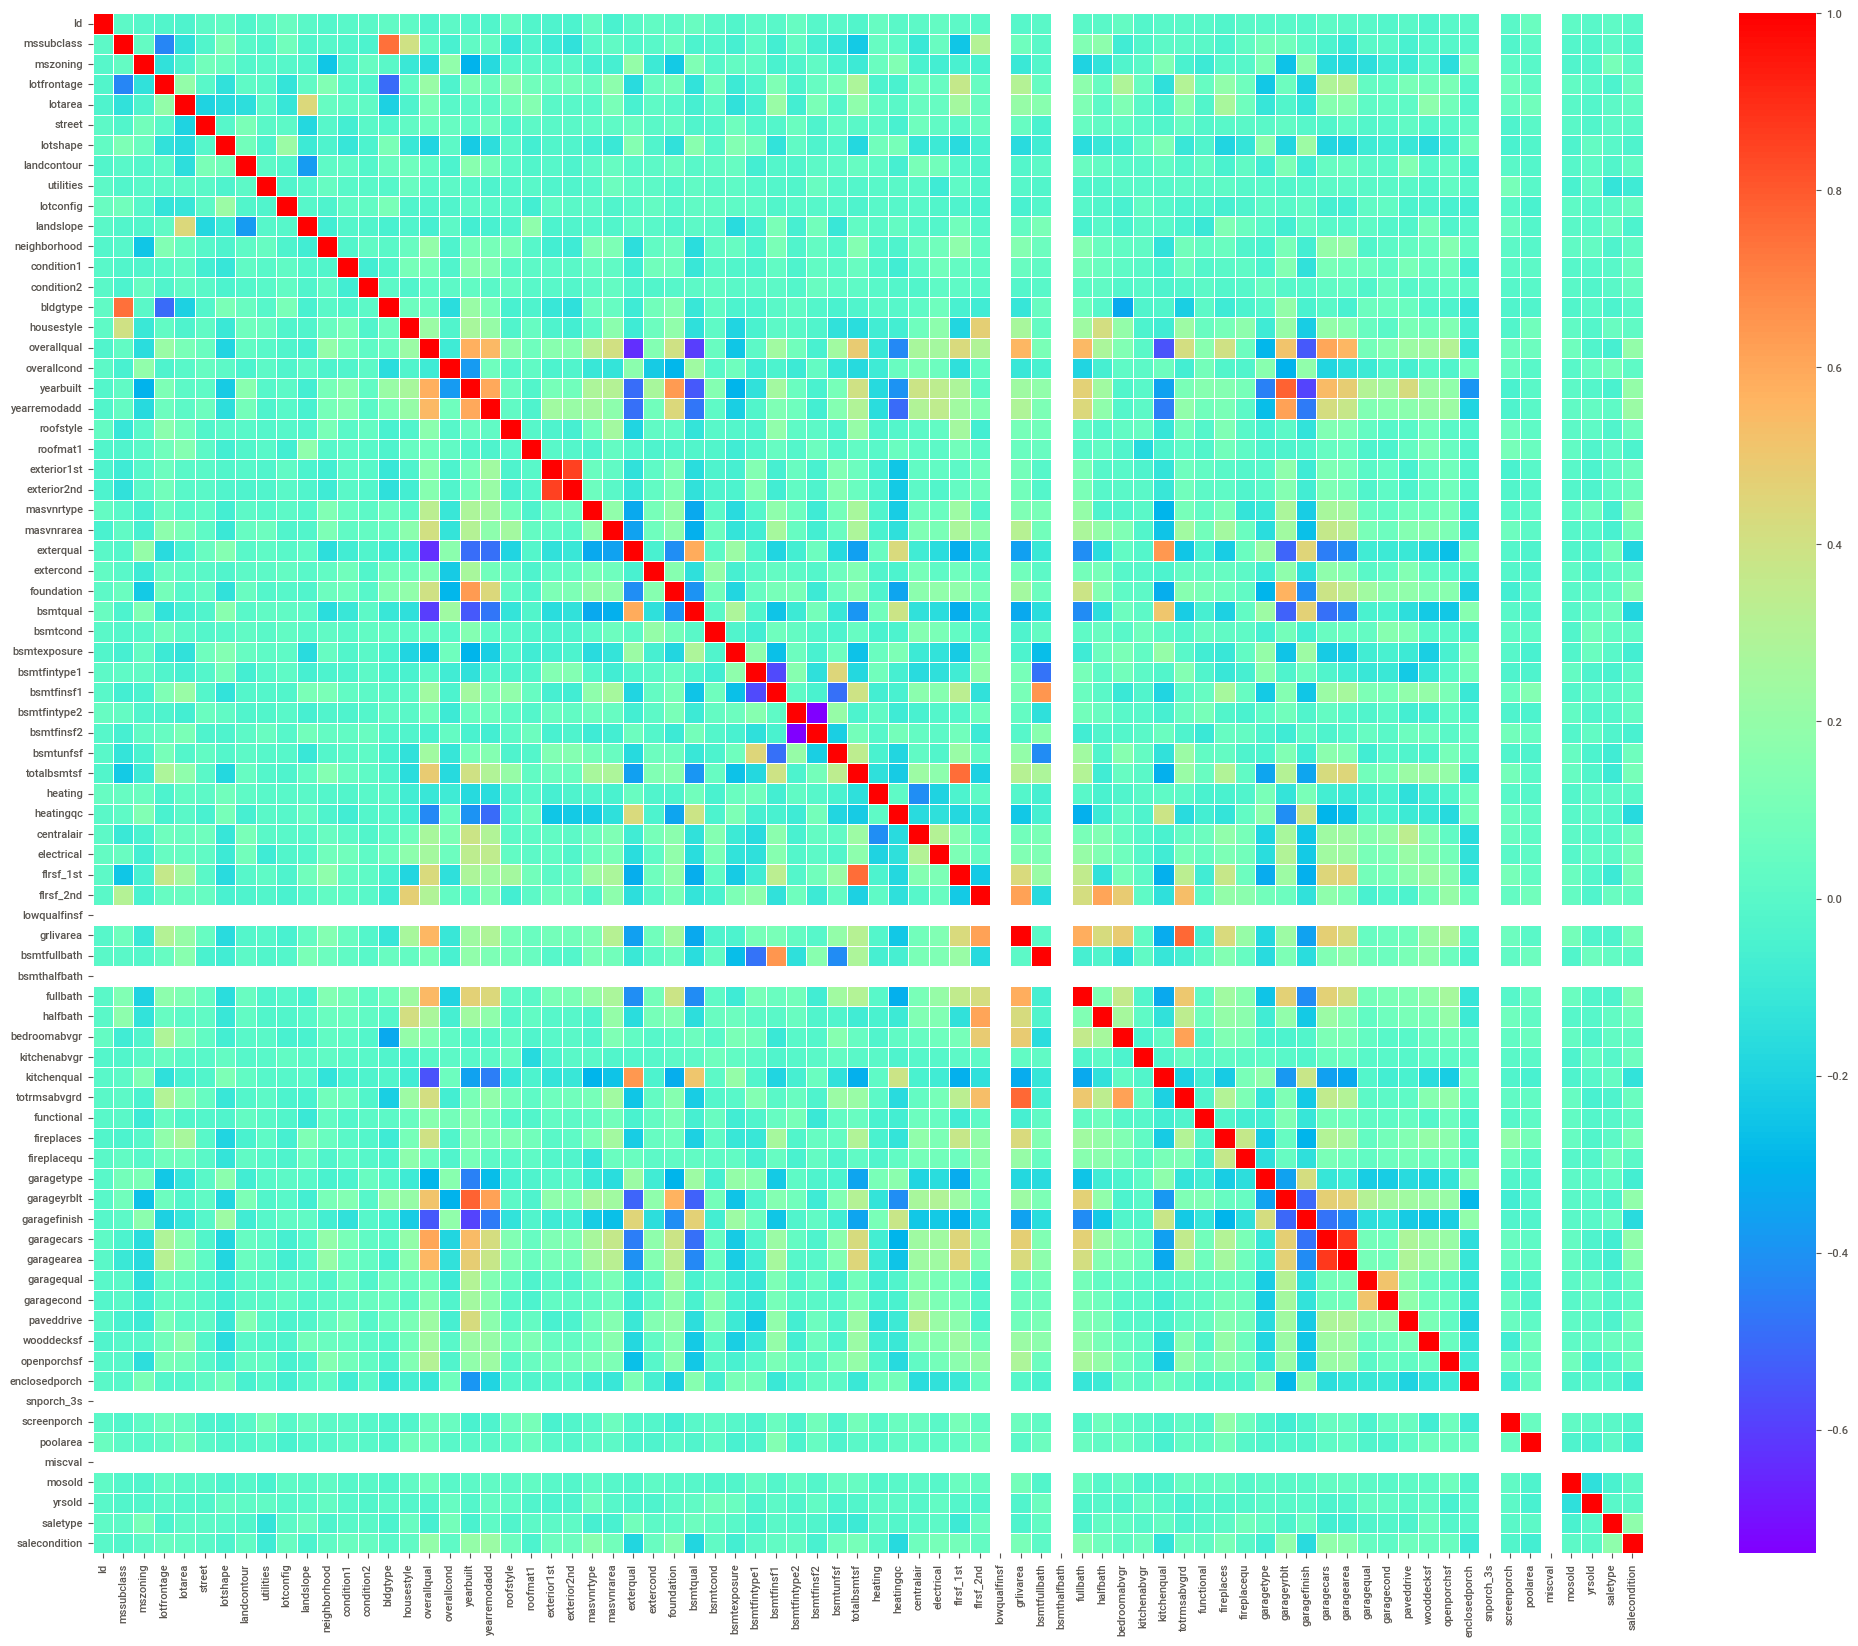

In [257]:
#Plot heatmap to detect correlations among numerical variables
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(X.corr(),cmap='rainbow',linewidths=.5)
plt.show()

Observation:

Target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea As there is multicollinearity among predictors in the data, it would be good to use advance regression technique.

Also, many other columns are highly correlated with each other, so will drop one of them

GarageCars and GarageArea GarageYrBlt and YearBuilt TotRmsAbvGrd and GrLivArea TotalBsmtSF and 1stflrSF Dropping Less Significant Features Observation: OverallQual, GrLivArea ,GarageArea, 1st Flr SF, Full Bath, Year Built have greater influence on target variable Sale Price

Also from the above count plots, we can spot some features with a consider amount of skewing in the data. We will analyze how much skewed the data exactly is, and then take action based on that after creation of dummies.

In [258]:
# Dropping one in the pair has greater correlation
#data.drop(columns=['TotRmsAbvGrd','Total_Bathrooms','Garage_age'], axis=1, inplace=True)
     

Observations:

MSZoning: Floating Village Residential(FV) have the highest SalePrice followed by Residential Low Density(RL) Steet : "Paved" type of road surface or access to the property have the highest SalePrice. LotShape : Slightly irregular LotShape have the highest SalePrice Utilities : Most of the houses in the dataset have all the public utilities HouseStyle : 2 storied houses have the highest SalePrice RoofMatl: Roof material type Wood Shingles have the highest SalePrice ExterQual: Houses with Excellent quality of material on the exterior have the highest SalePrice ExterCond : Houses with Excellent condition of material on the exterior have the highest SalePrice Heating, HeatingQC : Houses having excellent heating quality and kitchen quality have the highest SalePrice

Some other notable observations are:

The SalePrice range is most significant for houses with average fireplace quality. SalePrices peak when the garage is finished, contributing to the highest values. The widest range of SalePrices is observed in houses with typical or average garage quality and condition. There are limited houses with an excellent garage condition. Houses featuring an excellent quality basement achieve the highest SalePrices. Housing units with well-designed living quarters (BsmtFinType1=GLQ) exhibit the highest SalePrices. A considerable number of houses either have an unfinished basement or no basement (labeled as None).

In [259]:
X_train, X_test, Y_train, Y_test = train_test_split(data, Y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [260]:
print("Size of training observations: ", X_train.shape)
print("Size of test data: ", X_test.shape)

Size of training observations:  (1168, 77)
Size of test data:  (292, 77)


1) Decision tree regressor
A decision tree regressor is a type of machine learning algorithm used for regression tasks.
It operates by recursively partitioning the feature space into smaller regions and fitting a simple model (usually a constant value) within each region.
These partitions form a tree-like structure where each internal node represents a decision based on a feature value, and each leaf node represents a predicted value.
decision tree regressors have several advantages, including their interpretability, ability to handle non-linear relationships, and robustness to outliers.
However,the decision trees are prone to overfitting, especially when the tree is allowed to grow deep. Techniques like pruning, ensemble methods (e.g., Random Forest, Gradient Boosting), and regularization can help alleviate this issue.

In [261]:
# Importing the decision tree regressor.
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

# Initialize the Decision Tree Regression model
data = DecisionTreeRegressor(random_state=42)

# Training the model
data.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [262]:
# predict the values of Testing data 
ytt = data.predict(X_test)
ytt

array([154000., 325300., 115000., 159000., 315750.,  76000., 313000.,
       146500.,  84500., 136000., 145000., 130000.,  81000., 214000.,
       181000., 134450., 183000., 135000., 118500., 227000., 155000.,
       210000., 173900., 129000., 192000., 154000., 181000., 141000.,
       181000., 208500., 127000., 285000., 200500., 136000., 255500.,
       140000., 138000., 219210., 310000.,  97000., 114500., 205000.,
       119500., 252000., 128500., 118000., 115000., 127000., 430000.,
       144000., 119000., 196000., 115000., 287000., 144000., 260400.,
       213000., 174500., 106500., 108000.,  72500., 154000., 315750.,
       265000., 281000., 241500., 109500., 306000.,  93000., 175900.,
       118964., 133700., 109000.,  92900., 625000., 173000., 354000.,
       340000., 141000., 125000., 118000.,  61000., 112500.,  91000.,
       149700., 133000., 267000., 190000., 156000., 156000., 153000.,
       151500., 124500., 302000., 136500., 170000., 204750., 184100.,
       205950., 2580

In [263]:
# checking the accuracy or evaluate the model.
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

r22 = r2_score(Y_test,ytt)
r22

0.9904928402755437

2) Random Forest Regressor
A Random Forest Regressor is an ensemble learning method based on decision trees.
It builds multiple decision trees during training and outputs the mean prediction of the individual trees for regression tasks.
Random Forests can be computationally expensive and may not be as interpretable as single decision trees.

Random Forest Hypertunning

In [264]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train, Y_train)  # ravel() flattens the y_train array to 1D


RandomForestRegressor()

In [265]:
# Predicting the test set results
Y_pr = random_forest.predict(X_test)
# checking accuracy
r2s = r2_score(Y_test,Y_pr)
r2s

0.9893704445959447

3) Gradient boosting regressor
Gradient Boosting Regressor is a machine learning algorithm used for regression tasks, where the goal is to predict continuous numerical values.
It belongs to the family of ensemble learning methods, specifically boosting algorithms.

In [266]:
# Importing 
from sklearn.ensemble import GradientBoostingRegressor
# Initialize the model
gb = GradientBoostingRegressor()
# Train the model
gb.fit(X_train,Y_train)

GradientBoostingRegressor()

In [267]:
yh = gb.predict(X_test)
yh

array([155002.38030398, 325144.52912351, 115468.30926744, 159874.35270063,
       313581.54869192,  75949.4095341 , 311329.47808448, 146846.53412985,
        85415.59980476, 135308.66852443, 145337.30529901, 129838.29112735,
        80618.15668366, 213861.29917729, 180939.66998853, 133549.63302668,
       184145.78680926, 135219.10147143, 119234.58766955, 225992.64630202,
       154990.22756647, 210433.11246417, 174338.33191031, 129067.90137538,
       191589.0287033 , 155008.82846621, 180853.41366752, 140110.55224586,
       180939.66998853, 208395.31500417, 125895.00634329, 286115.30564206,
       200380.17926127, 135196.63255664, 255802.62074732, 140103.63394941,
       138087.11398164, 220673.31599349, 310699.94299935,  97944.85352098,
       115720.5247393 , 205071.88605535, 119469.51690689, 251754.55314484,
       128471.29855787, 119473.46550211, 115635.29863373, 125815.68112463,
       447183.0579383 , 143204.74536548, 119149.06798664, 197290.31996566,
       115738.93319316, 2

In [268]:
# checking the accuracy or evaluate the model.
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

r2sc = r2_score(Y_test,yh)
r2sc

0.9931568028695674

4) support vector regressor
Support vector regression is an extension of support vector machines for regression tasks.
It tries to find a hyperplane that best fits the data while minimizing the error.

In [269]:
# import th svr
from sklearn.svm import SVR
# Initialize the model
sv = SVR(C=100)
# train the model
sv.fit(X_train,Y_train)

SVR(C=100)

In [270]:
yp = sv.predict(X_test)
yp

array([162556.00034562, 192703.20092712, 154679.28819916, 163565.92735663,
       192298.07356246, 149787.4591821 , 192077.67527964, 160639.57288582,
       150588.82386318, 158538.41819194, 160440.2695221 , 157386.05262502,
       150353.75151028, 176778.22247092, 168828.0026892 , 158266.85808199,
       169437.43572502, 158356.19116204, 155250.86247387, 179497.52138187,
       162708.81388826, 175833.477725  , 167016.52015008, 157171.056729  ,
       171513.50413475, 162417.30550935, 168866.83572188, 159704.97707887,
       168849.45836614, 175533.46831898, 156798.92065742, 189587.43836512,
       173640.95588904, 158516.06426728, 185303.14157254, 159396.04302862,
       158970.15136216, 178024.59595467, 191983.09903258, 152052.4855038 ,
       154583.38172016, 174649.26541965, 155450.70228772, 184995.74559398,
       157098.78340415, 155108.96379221, 154672.42787616, 156800.42353012,
       185937.62252553, 160259.68075398, 155348.89253982, 172491.39168938,
       154658.51350879, 1

In [271]:
# checking the accuracy or evaluate the model.
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

rs = r2_score(Y_test,yp)
rs

0.20165131815027204

5) XGBoost Regressor
XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm known for its performance and efficiency in various types of predictive modeling tasks, including both classification and regression.

In the context of regression, XGBoost Regressor is a variant of the XGBoost algorithm specifically designed for regression problems.

It builds an ensemble of decision trees sequentially, where each tree tries to correct the errors made by the previous ones.

In [272]:
import xgboost

# importing the model library.
from xgboost import XGBRegressor

# object creation.
xgb_r = XGBRegressor()

# fitting the data
xgb_r.fit(X_train,Y_train)

# prediction
Y_hat = xgb_r.predict(X_test)

# for checking performance of model.
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

r2score = r2_score(Y_test,Y_hat)
r2score

0.9907780816283659

Cross validation
cross-validation is a technique used to assess how well a predictive model generalizes to an independent dataset.
It helps to evaluate the performance of a model and to tune hyperparameters without the need for a separate validation set.
cross-validation is a powerful technique for evaluating and selecting models, tuning hyperparameters, and assessing the generalization performance of machine learning algorithms.
It helps in obtaining a more robust estimate of a model's performance by leveraging the entire dataset for both training and evaluation.

In [273]:
from sklearn.model_selection import cross_val_score
models = [data, random_forest,gb,sv, xgb_r]

for m in models:
    score = cross_val_score(m,X,Y,cv=5)
    print('Cross validation score',m,)
    print('CV Score :',score.mean())
    print('std : ',score.std())
    print('=================================================')

Cross validation score DecisionTreeRegressor(random_state=42)
CV Score : 0.6557578457042512
std :  0.07429350229182304
Cross validation score RandomForestRegressor()
CV Score : 0.851610354241634
std :  0.013062764577490697
Cross validation score GradientBoostingRegressor()
CV Score : 0.8625988039770089
std :  0.02905651033475329
Cross validation score SVR(C=100)
CV Score : 0.024719696049592343
std :  0.023493791954066808
Cross validation score XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
        

Hyper parameter tunning
Hyperparameter tuning is the process of finding the optimal hyperparameters for a machine learning model to improve its performance on unseen data.
Hyperparameters are configuration settings that are not directly learned from the data but rather set prior to the training process. Common examples include the learning rate, regularization strength, tree depth, and number of estimators.
Hyperparameter tuning is a crucial step in the machine learning pipeline to maximize the performance of your models and achieve the best results on real-world data.

# Model Comparison Report

In [274]:
m_report = pd.DataFrame()
m_report['Model'] = ['Decision tree regressor','Random Forest Regressor','Gradient boosting regressor','XGBoost Regressor']
m_report['r2_score'] = [0.99,0.98,0.99,0.99]
m_report

,Model,r2_score
0,Decision tree regressor,0.99
1,Random Forest Regressor,0.98
2,Gradient boosting regressor,0.99
3,XGBoost Regressor,0.99


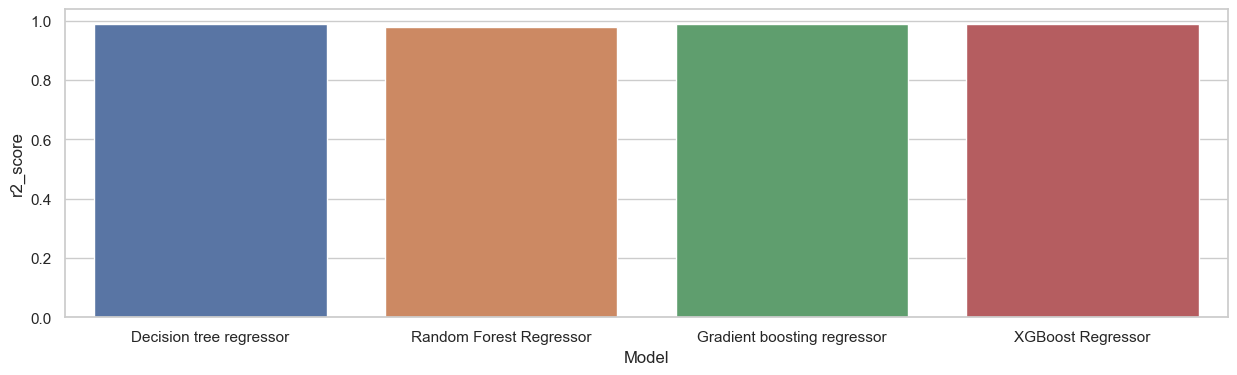

In [275]:
plt.figure(figsize=(15,4))
sns.set(style='whitegrid')
ax=sns.barplot(x='Model',y='r2_score',data=m_report)

Challenges Faced
Data Quality and Quantity: Obtaining high-quality data with sufficient quantity can be challenging. Incomplete or noisy data, missing values, and outliers can affect the performance of the regression model.
Feature Engineering: Identifying and engineering relevant features from the dataset can be complex. It involves selecting the most predictive features, handling categorical variables, dealing with multicollinearity, and creating new features through transformations or interactions.
Model Selection and Tuning: Choosing the right regression algorithm and tuning its hyperparameters for optimal performance can be challenging. It requires experimenting with different regression models (e.g., linear regression, decision trees, ensemble methods) and conducting hyperparameter tuning using techniques like grid search or randomized search.

Conclusion:
This project involves various challenges and considerations, but with careful planning and execution, it can yield accurate and reliable predictions.
Data Quality and Feature Engineering: High-quality data and effective feature engineering are crucial for building a successful regression model.
It's essential to handle missing values, outliers, and categorical variables appropriately, as well as engineer informative features that capture the underlying patterns in the data.
Experimenting with different regression algorithms and tuning their hyperparameters is essential to find the optimal model for the prediction task. Techniques like grid search or randomized search can help identify the best-performing model configuration.
Accuracy of Decision Tree Regressor : 0.99

Accuracy of Random forest regressor : 0.98

Accuracy of Gradient boosting regressor : 0.99

Accuracy of XGBoost regressor : 0.99